# Unsupervised Learning: Trade&Ahead


### Daniele Pelizan

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)  # adds a nice background to the graphs

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# to filter a specific warning
warnings.simplefilter("ignore", ConvergenceWarning)



# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances in K-means clustering
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer



# to compute distances in Hierarchical clustering
from scipy.spatial.distance import pdist 

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

### Loading Data

In [2]:
# reading the dataset
TradeAhead = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying dataset to another variable to avoid any changes to original data
df = TradeAhead.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [4]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060


<IPython.core.display.Javascript object>

In [5]:
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.260,14.888,1.845,15,459,-1032187000,-4359082000,-4.640,939457327.600,28.976,6.262
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516,-8.699,1.479,142,27,159000000,1293000000,2.970,435353535.400,17.682,-3.838
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.590,9.348,1.404,1,100,376000000,147000000,0.780,188461538.500,131.526,-23.884
338,ZION,Zions Bancorp,Financials,Regional Banks,27.300,-1.159,1.468,4,99,-43623000,309471000,1.200,257892500.000,22.750,-0.063
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.920,16.679,1.610,32,65,272000000,339000000,0.680,498529411.800,70.471,1.723


<IPython.core.display.Javascript object>

* The column names have spaces in it. We are going to fix it.
* Security is the name of each company. We are going to change Security for Company to understand easier what the column refer to.
* The Estimated Shares Outstanding, Net Cash Flow and Net Income values are in billions and millions.
* The Current price, Price Change, Volatility, ROE, Cash Ratio, Earnings per Share, P/E Ration and P/B Ratio values are in hundreds, tens and ones.
* We are going to scale the features so no columns dominate our calcualtions.
* Price Change, Net Cash Flow, Net Income, Earnings per Share and P/B ratio have positive and negative values. This negatives values are true values.

### Fixing the column names

In [6]:
df.columns = [i.replace(" ", "_") for i in df.columns]
df.rename(columns={"Security": "Company"}, inplace=True)
df.head()

,Ticker_Symbol,Company,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.350,10.000,1.687,135,51,-604000000,7610000000,11.390,668129938.500,3.718,-8.784
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240,8.339,2.198,130,77,51000000,5144000000,3.150,1633015873.000,18.806,-8.750
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910,11.301,1.274,21,67,938000000,4423000000,2.940,1504421769.000,15.276,-0.394
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940,13.977,1.358,9,180,-240840000,629551000,1.260,499643650.800,74.556,4.200
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320,-1.828,1.701,14,272,315120000,696878000,0.310,2247993548.000,178.452,1.060


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [7]:
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The data set has 340 rows and 15 columns.


<IPython.core.display.Javascript object>

### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the dataset.

### Checking for missing values

In [9]:
df.isnull().sum()

Ticker_Symbol                   0
Company                         0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset.

### Checking the data types of the columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

<IPython.core.display.Javascript object>

* There are four variables that are **object** data-type: `Ticker_Symbol`, `Security`, `GICS_Sector` and `GICS_Sub_Industry`. We are going to convert these into **category** data_type.
* There are eleven numerical columns, the financial indicators. Four of them are int64 and seven of them are float64.

### Lets convert the columns with an 'object' datatype into categorical variables

In [11]:
for feature in df.columns:  # Loop through all columns in the dataframe
    if df[feature].dtype == "object":
        df[feature] = pd.Categorical(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker_Symbol                 340 non-null    category
 1   Company                       340 non-null    category
 2   GICS_Sector                   340 non-null    category
 3   GICS_Sub_Industry             340 non-null    category
 4   Current_Price                 340 non-null    float64 
 5   Price_Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash_Ratio                    340 non-null    int64   
 9   Net_Cash_Flow                 340 non-null    int64   
 10  Net_Income                    340 non-null    int64   
 11  Earnings_Per_Share            340 non-null    float64 
 12  Estimated_Shares_Outstanding  340 non-null    floa

<IPython.core.display.Javascript object>

* The variables `Ticker_Symbol`, `Security`, `GICS_Sector` and `GICS_Sub_Industry` are **category** data_types now.

### Dropping Ticker_Symbol 

In [12]:
# Checking how many unique values we have in Ticker_Symbol
df["Ticker_Symbol"].nunique()

340

<IPython.core.display.Javascript object>

In [13]:
# Ticker_Symbol is the unique identifier of a particular stock on a particular stock market,
# so we are going to drop it from our data set
df = df.drop("Ticker_Symbol", axis=1)

<IPython.core.display.Javascript object>

### Summary of the dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current_Price,340.000,80.862,98.055,4.500,38.555,59.705,92.880,1274.950
Price_Change,340.000,4.078,12.006,-47.130,-0.939,4.820,10.695,55.052
Volatility,340.000,1.526,0.592,0.733,1.135,1.386,1.696,4.580
ROE,340.000,39.597,96.548,1.000,9.750,15.000,27.000,917.000
Cash_Ratio,340.000,70.024,90.421,0.000,18.000,47.000,99.000,958.000
Net_Cash_Flow,340.000,55537620.588,1946365312.176,-11208000000.000,-193906500.000,2098000.000,169810750.000,20764000000.000
Net_Income,340.000,1494384602.941,3940150279.328,-23528000000.000,352301250.000,707336000.000,1899000000.000,24442000000.000
Earnings_Per_Share,340.000,2.777,6.588,-61.200,1.558,2.895,4.620,50.090
Estimated_Shares_Outstanding,340.000,577028337.754,845849595.418,27672156.860,158848216.100,309675137.800,573117457.325,6159292035.000
P/E_Ratio,340.000,32.613,44.349,2.935,15.045,20.820,31.765,528.039


<IPython.core.display.Javascript object>

* The average stock price is USD 80. The median is USD 60. Maximum stock price is much bigger than the price of the third quartile, so this distribution is right skewed.
* The Price_Change has postivie and negative values. Since this variable is the change in the stock price is normal to have negative values.
* The average and median of the Volatility are similar, around 1.4.
* The minimum ROE is 1%. 
* The average Net_Income is USD 1.5 billions.
* The Net_Cash_Flow and Net_Income have positive and negative values, which is expected
* The Earnings_Per_Share and P/B_ Ratio have positive and negative values. This is expected as this indicatores are obtained using the Net_Income and the Book value per share, that can be negative.

In [15]:
df.describe(include="category").T

,count,unique,top,freq
Company,340,340,3M Company,1
GICS_Sector,340,11,Industrials,53
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16


<IPython.core.display.Javascript object>

In [16]:
cat_columns = ["GICS_Sector", "GICS_Sub_Industry"]
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts(dropna=False))
    print("*" * 50)

Unique values in GICS_Sector are :
Industrials                    53
Financials                     49
Consumer Discretionary         40
Health Care                    40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS_Sector, dtype: int64
**************************************************
Unique values in GICS_Sub_Industry are :
Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Internet Software & Services                       12
Electric Utilities                                 12
MultiUtilities                                     11
Health Care Equipment                              11
Banks                                              10
Property & Casualty Insurance      

<IPython.core.display.Javascript object>

* There are 340 unique companies in our dataset.
* There are 11 economic sectors. The sector with most companies is the Industrials, followed by the Financials.
* There are 104 sub-industries groups. The sub-industry group with the bigger number of companies is the Oil & Gas Exploration & Production followed by REITs and Industrial Conglomerates.
* Some sub-industries groups have only one company.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

### Plotting histograms and boxplots for all the variables

In [17]:
# For numerical variables we want to study the dispersion and central tendency
# For this purpose we are going to plot histograms and box plots
# We are going to create a function that generates the plots
# This function takes the numerical variable as the input


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # Using the function fig, ax = plt.subplots() to create 2 subplots
    # The subplots will be on top of each other: nrows = 2
    # The subplots will share the x-axis: sharex = True
    # The first subplot, ax_box2, will have 25% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}
    # The second subplot, ax_hist2, will have 75% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating the boxplot in the first subplot ax_box2, with the mean value displayed as a triangle (showmeans=True)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="red")

    # Creating an histogram in the second subplot ax_hist2
    # with an specificied number of bins if it was given in the function
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="blue")

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )
    # Add a legend to the histogram and position it outside the plot
    ax_hist2.legend(bbox_to_anchor=(1, 1))

<IPython.core.display.Javascript object>

### Current_Price
1 - What does the distribution of stock prices look like?

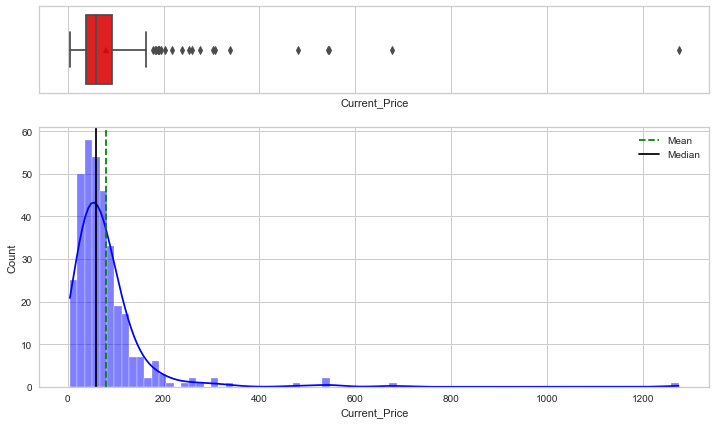

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Current_Price", kde=True)

* The distribution of the current stock price is right skewed, with some few companies having stock prices higher than USD 400.
* The majority of the companies have stock prices below USD 180, and the average stock price is USD 80.
* There are some outliers, and we presume that this are real values, as some companies can have high value stock prices.

### Price_Change

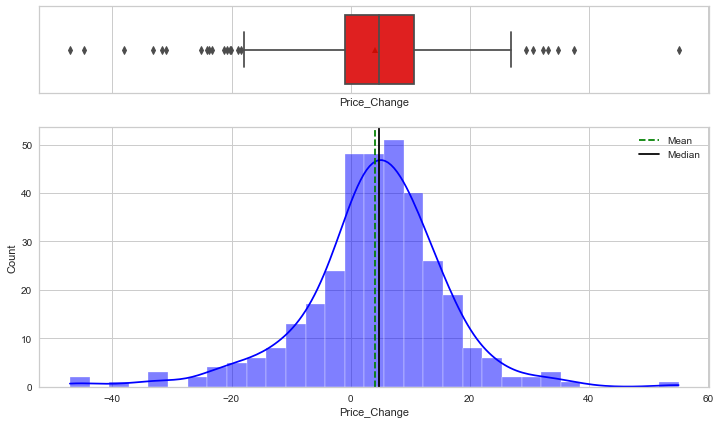

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Price_Change", kde=True)

* The distribution of percentage change in the stock price (in 13 weeks) is a bell shape curve, similar to a normal distribution.
* The average change in stock price is 4%, with changes as low as -40% and as high as 55%. 
* There are some outliers, but we presume this are real values as stocks can have sharp falls and rises.

### Volatility

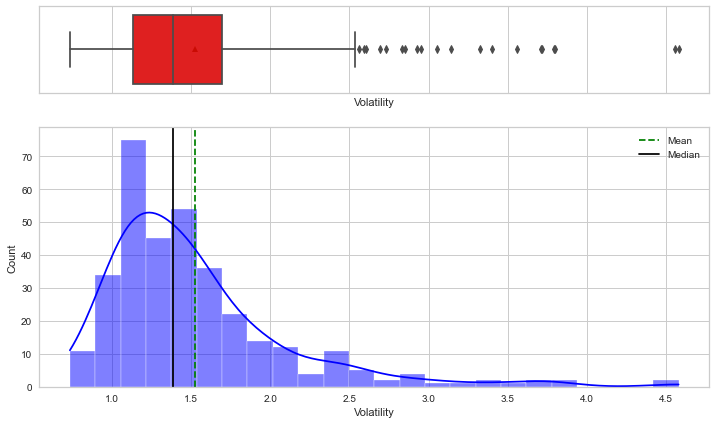

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Volatility", kde=True)

* The distribution of volatility is right skewed.
* The Volatility is the standard deviation of the stock price.
* The average volatility is 1.5, which means that if the price of the stocks in this dataset followed a normal distribution, 68% of the prices would fall within 1.5 more or less the average price.
* Half of the companies have a low dispersion, a volatility lower than 1.3.
* There are some companies with high volatility, with stock prices that fluctuates more, which can be riskier to invest.
* There are some outliers, but we presume this are real values as stocks can have big fluctuations.

### ROE - Return on Equity

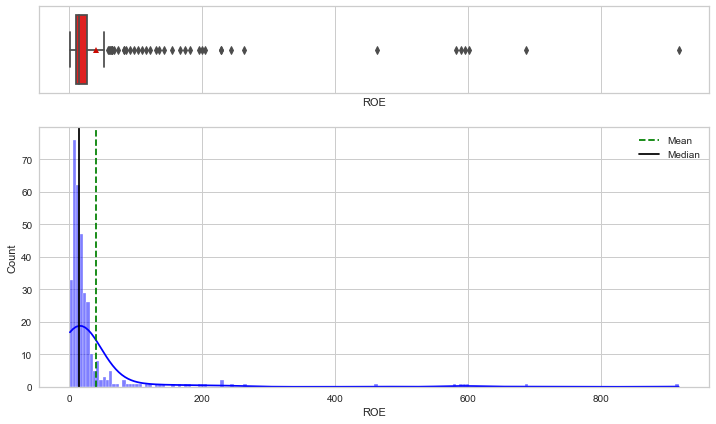

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "ROE", kde=True)

* The distribution of the Return on Equity is highly right skewed.
* The median ROE is 15%. 
* The ROE is the return on net assets, and net assets varies depending of the industry's type. ROE should be analysed considering the industry type.
* There are a lot of outliers and some huge values of ROE, bigger than 200%. We presume this are real values, as companies can have high ROEs due to:
    * small equity account compared to net income. This situation is not good, indicates risk.
    * net income extremely large compared to equity, which is is good, the performance of the company is strong.

### Cash_Ratio

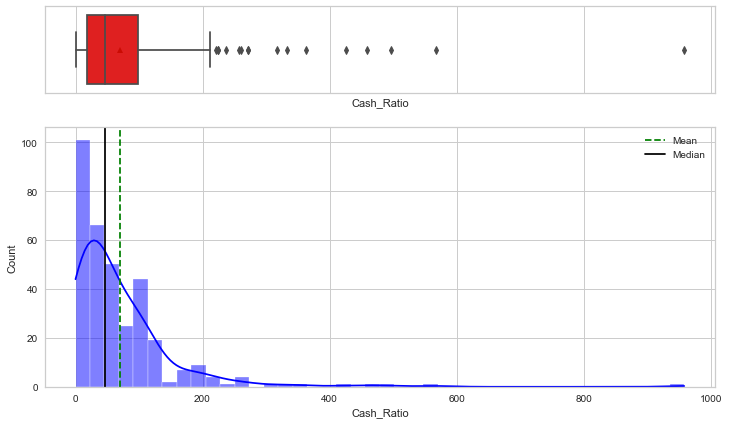

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "Cash_Ratio", kde=True)

* The distribution of Cash Ratio is right skewed.
* Cash Ratio shows a company ability to cover its short-term obligations.
* The median value of Cash Ratio is 47%. Values less than 100% means that are more liabilities than cash, which is the case of half of the companies in this dataset. This could means a company is having financial diffitulty or it could means the company could be using the cash to invest in projects. 
* Cash Ratio should be analysed considering the industry type.
* There are some outliers bigger than 200%. We presume this are real values, as companies can have more cash than liabilities. This may indicate the comapny is ineficient in utilizing cash to invest in profitable projects.
* There are some companies in the dataset that has 0 Cash Ratio. This could be the companies that are in a bad situation, without cash and cash equivalents.

### Net_Cash_Flow

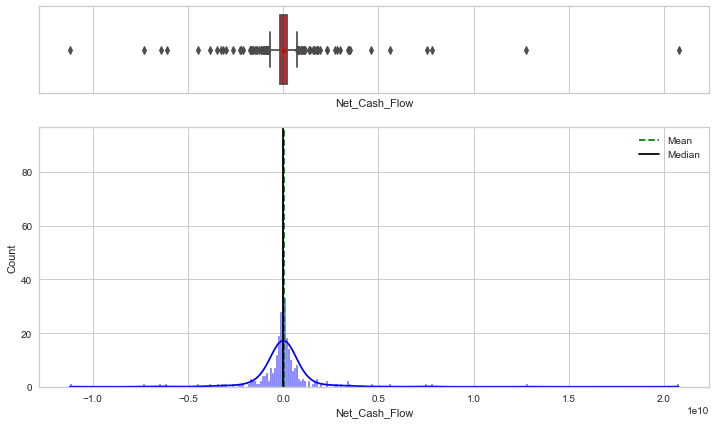

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "Net_Cash_Flow", kde=True)

* The distribution of net cash flow is a bell shape curve, similar to a normal distribution.
* The average net cash flow is 55 million and the median is 2 millions.
* There are a some outliers, postive and negative, as some big companies can generate big inflows and outflows.

### Net_Income

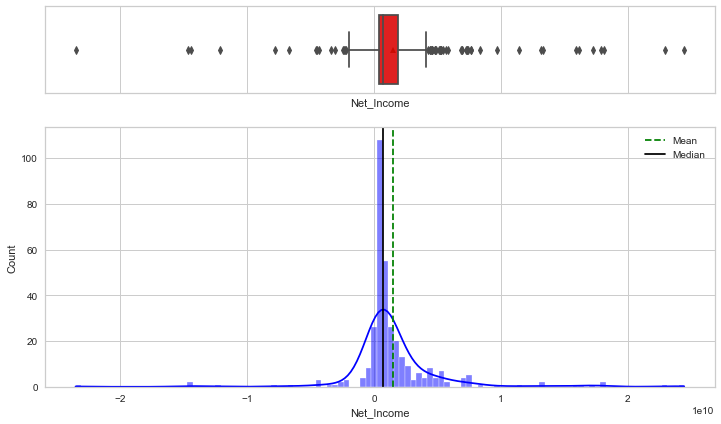

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "Net_Income", kde=True)

* The distribution of net net income is a bell shape curve, similar to a normal distribution.
* The average net income is 1.5 billions and the median is 700 millions.
* There are a some outliers, positive and negative, as some big companies can generate big net incomes.
* A negative net income means a company is having a decline in sales or a poor management of expenses, or it can be a start up company that its not profitable yet.
* A positive net income means a company is profitable.

### Earnings_Per_Share - EPS

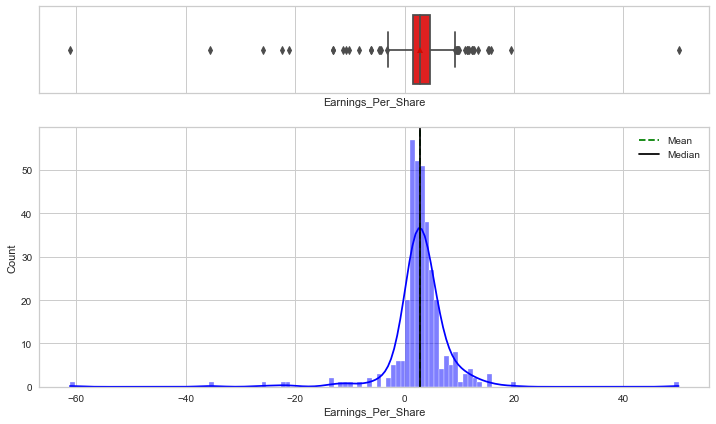

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "Earnings_Per_Share", kde=True)

* The distribution of earnings per share is a bell shape curve, similar to a normal distribution.
* EPS indicates how much money a company makes for it share of its stock.
* The average earning per share is 2.8 USD and the median is 2.9 USD.
* It's a measure of a firm's profitability. The higher the better, but it should be compared to the competitors and expected values.
* There are a some outliers, positive and negative, as some big companies can generate big positive or negative net incomes, or some companies could have small number of shares.

### Estimated_Shares_Outstanding

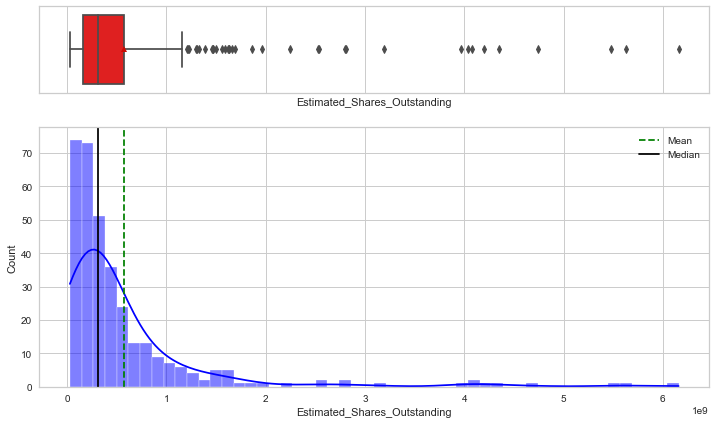

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "Estimated_Shares_Outstanding", kde=True)

* The estimated share outstanding distribution is right skewed, with some companies with a high number of stocks.
* The average number of stocks of a company in our dataset is 580 millions, the median is 300 millions.
* This variable is used to calculate the Earnings per Share.
* There are some outliers, as some big companies can have the number of stock greater than 1 billion.

### P/E_Ratio  - Price to Earnings

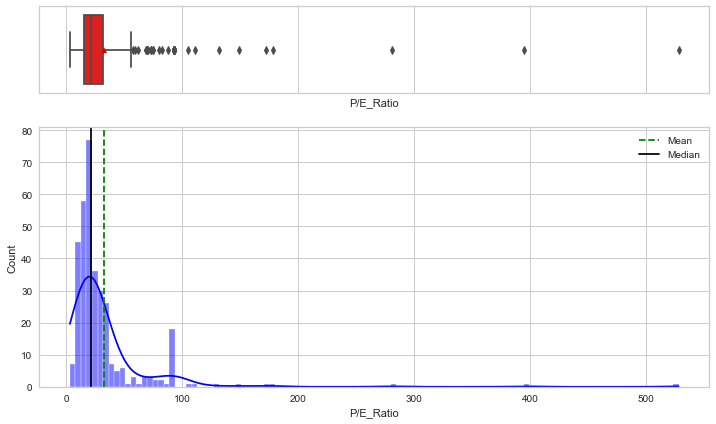

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "P/E_Ratio", kde=True)

* The P/E ratio distribution is right skewed.
* The average value of the Price to Earnings is 32, which means an investor is willing to pay USD 32 for USD 1 of current earnings.
* The P/E ratio is a measure of stock valuation. A high P/E ratio could mean that a company's stock is overvalued. A low P/E ratio means a stock price is undervalued.
* It is better to compare a P/E ratio of a company with the P/E ratio of its industry group.
* There are some outliers, with companies having a Price to Earnings ratio bigger than 100. This could be companies with overvalued stock price, or investors are expecting company's high growth rates in the future.

### P/B_Ratio  - Price to Book Ratio

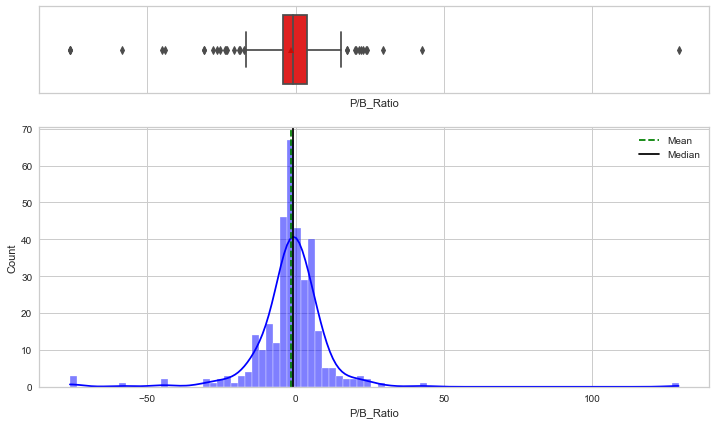

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "P/B_Ratio", kde=True)

* The P/B ratio distribution has a bell shape, similar to a normal distribution.
* The P/B ratio measures the market's valuation of a company relative to its book value.
* The average price to book ratio is - 1.7 and the median is -1. 
* Approximately half of the companies in our dataset have a negative price to book ratio. This negative values could indicate that a company is insolvent or on the verge of bankruptcy.
* High-growth companies will often show price-to-book ratios well above 1.0. 
* Any value under 1.0 is considered a good P/B for value investors, indicating a potentially undervalued stock.
* As with most ratios, this varies by industry. 
* There are some negatives and positives outliers, indicating companies that are in a bad financial situation and companies that have a high growth respectively.

In [29]:
# For categorical variables we want to study the number of observations in each category
# For this purpose we are going to plot a bar graph using the countplot function
# We are going to create a function that generates the plots
# This function takes the categorical variable as the input
# The bars will be labeled with the number of observations
# For the argument perc=True the bar will be labeled with the percentage of observations
# For the argument n= any integer number, the plot will have the n bars with the biggest number of obervations


def labeled_barplot(data, feature, perc=False, n=None):

    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column - number of rows in that column
    count = data[feature].nunique()  # nunique is number of unique values

    # Determining the figure size considering the number of bars
    if n is None:
        plt.figure(
            figsize=(count + 2, 7)
        )  # count+1 :the number of bars that we have + 1
    else:
        plt.figure(figsize=(n + 2, 7))  # n+1: number of bars that we want + 1

    plt.xticks(rotation=90, fontsize=15)  # Rotating the x axis labels

    # Creating the bar plot with a variable ax assigned to our plot. Then latter we can make manipulatios in this plot.
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # Iterating over the bars one-by-one using the patches function to count the number of bars
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # calculating the percentage of each class of the category
        else:
            label = p.get_height()  # count of each class of the category

        # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label
        x = p.get_x() + p.get_width() / 2

        # Get the y coordinate of the text by getting the height of the bar
        y = p.get_height()

        # Writing our label in the x,y coordinates over the bar,
        # and leave some space between the label and the boundary of the bar (xytext)
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()  # Show the plot

<IPython.core.display.Javascript object>

### GICS_Sector

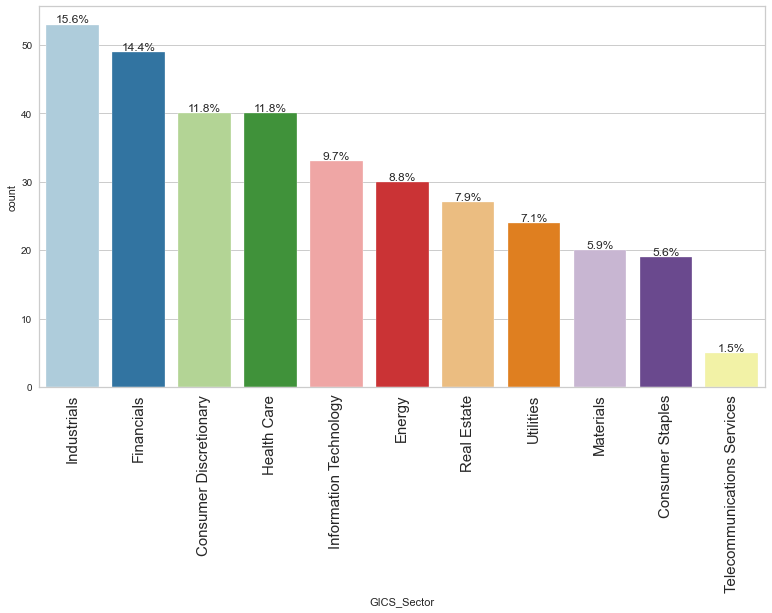

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "GICS_Sector", perc=True)

* 15 % of the companies in our dataset are in the Industrials economic sector.
* 14 % of the companies in our dataset are in the Financials economic sector.
* 12 % of the companies in our dataset are in the Consumer Discretionary economic sector.
* Only 1.5% of the companies in our dataset are in the Telecommunications Services economic sector.

### GICS_Sub_Industry

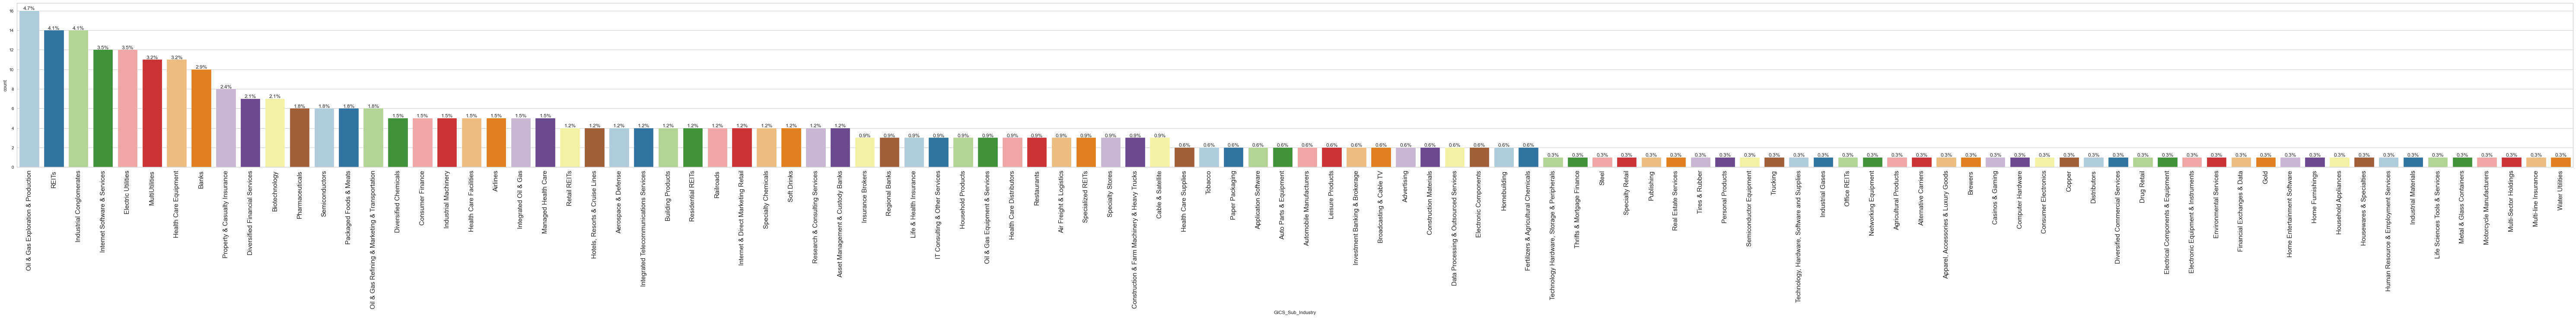

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "GICS_Sub_Industry", perc=True)

* 4.7 % of the companies in our dataset are in the Oil & Gas sub-industry group.
* 4.1 % of the companies in our dataset are in the REITs sub-industry group.
* 4.1 % of the companies in our dataset are in the Industrial Conglomerates sub-industry group.
* A big number of sub-industry groups have only one company, corresponding to 0.3% of each sub-industry group.

### Bivariate analysis

### Correlation between the numerical variables

3. How are the different variables correlated with each other?

corr < -0.7 or corr > 0.7 indicates highly correlated attributes (strong linear dependence)
-0.7 < corr < -0.4 or 0.4  < corr < 0.7 indicates moderate correlation 
corr > -0.4 or corr < 0.4 indicates abscence of correlation

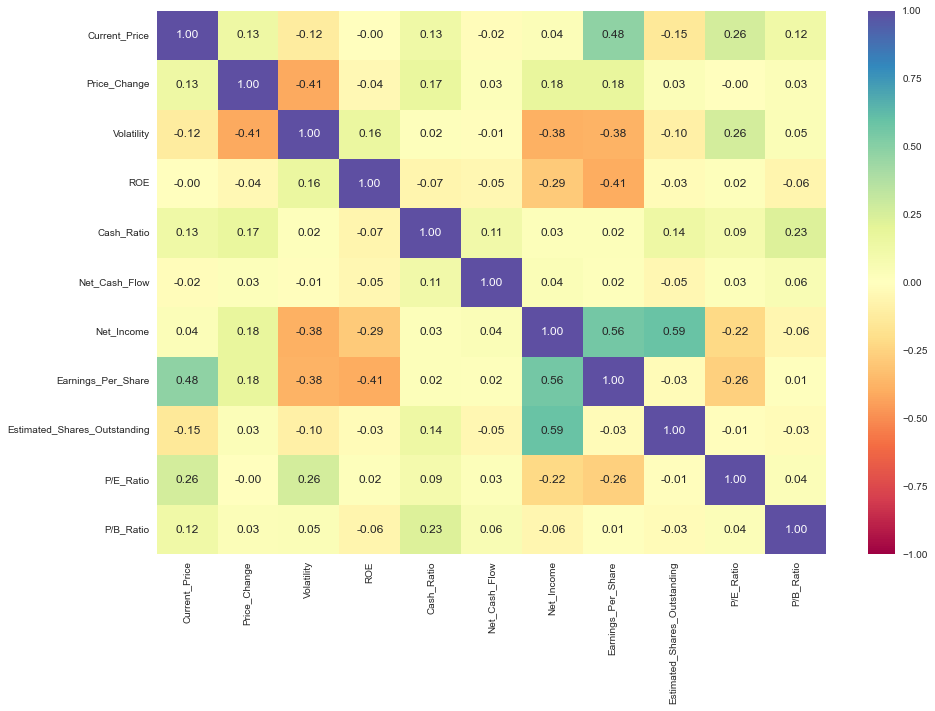

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Current_Price has a positive moderate correlation with Earnings_Per_Share. This could be because if a company have a higher Earning per Share, the investors will pay more for a company share (if they think the company has higher profit relative to its share price).
* Price Change has a negative moderate correlation with Volatility. Since Volatility is a measure of the degree to which prices move, it's natural that this two variables are correlated .
* ROE has a negative moderate correlation with Earnings_Per_Share.
* Earnings_Per_Share has a positive moderate correlation with Net_Income. The Net Income is used to obtain the value of Earnings per Share. The bigger the Net Income, the bigger the Earnings per Share.
* Estimated_Shares_Oustdanding has a positive moderate correlation with Net_Income. This could be beause the greater the company's Net Income, it will have a bigger number of stocks.

### Pairplot of the numerical variables

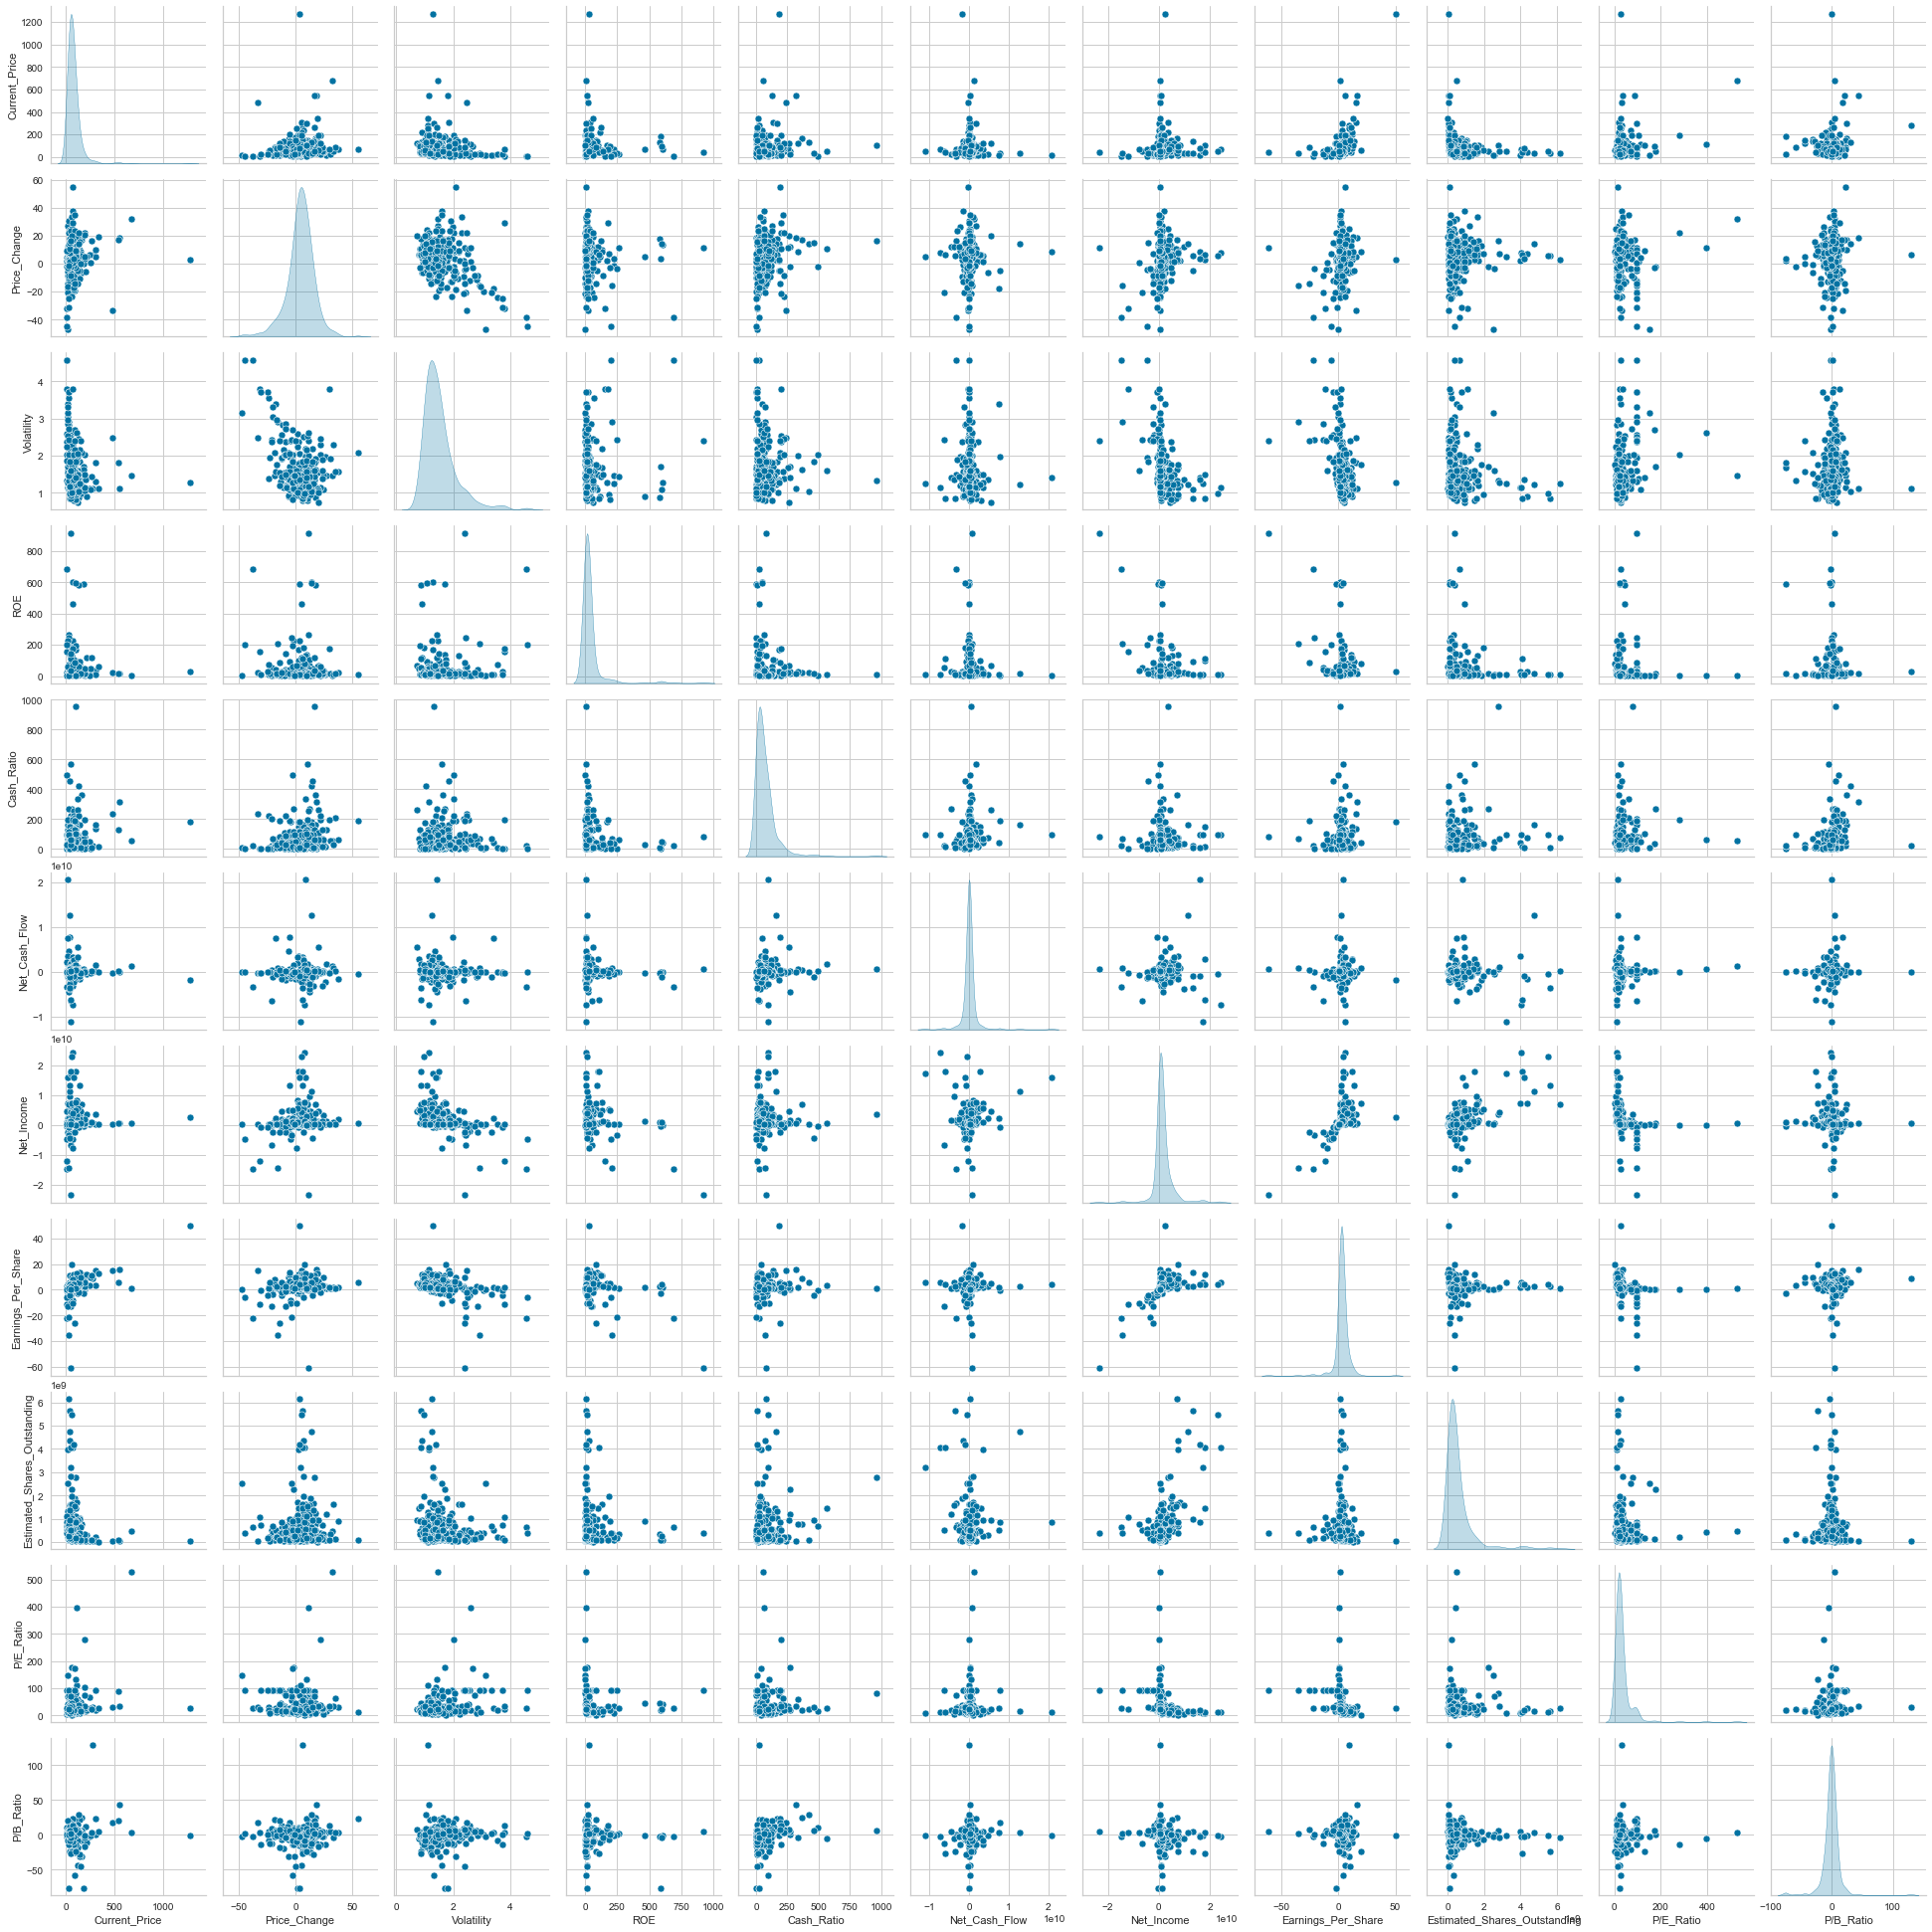

<IPython.core.display.Javascript object>

In [33]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

* P/E_Ratio seem to be bimodal.
* Price_Change, Net_Cash_Flow, Net_Income, Earnings_Per_Share and P/B_Ratio are similar to a normal distribution.

**Let's find the average value of the numerical variables for each economic sector, as this variables vary based on the industry the company operates in.**

In [34]:
# Let's create a function to plot barplot with the average of the numeric variable with a categorical variable


def barplot_average(data, x, y):
    """
    Barplot 

    data: dataframe
    x: categorical variable
    y: numerical variable
    figure_size: size of the plot (n row, n column)
    """

    plt.figure(figsize=(12, 5))

    sns.barplot(
        data=data,
        x=x,
        y=y,
        ci=None,
        order=data.groupby(x)[y].mean().sort_values(ascending=False).index,
    )

    plt.xticks(rotation=90, fontsize=15)  # Rotating the x axis labels
    plt.show()

<IPython.core.display.Javascript object>

### GICS_Sector and Current_Price

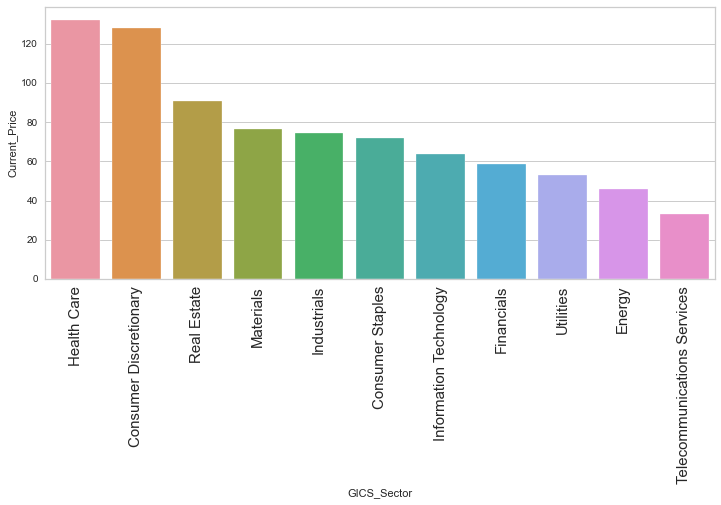

<IPython.core.display.Javascript object>

In [35]:
barplot_average(df, "GICS_Sector", "Current_Price")

* The Health Care Sector has the highest average sock price, around USD 130, followed closely by the Consumer Discretionary with an average stock price around USD 125.
* The Telecomunications Services has the lowest average sock price around USD 30.

### GICS_Sector and Price_Change
2. The stocks of which economic sector have seen the maximum price increase on average?

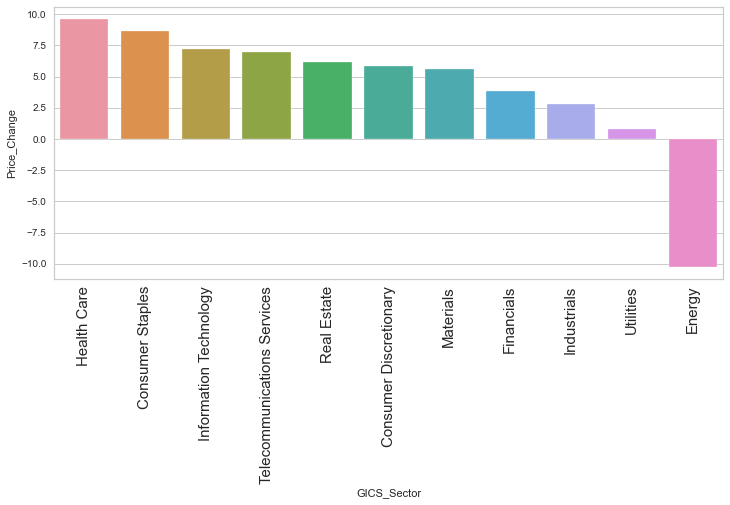

<IPython.core.display.Javascript object>

In [36]:
barplot_average(df, "GICS_Sector", "Price_Change")

* The Health Care Sector has the maximum stock price increase on average, around 9.5 %.
* The Consumer Staples Sector has the stock price increase on average, around 9 %.
* The Utilities Sector has the minimum price chage on average, around 1%.
* The Energy Sector is the only sector that has a decrease in the stock price, around -10 %.

### GICS_Sector and Volatility

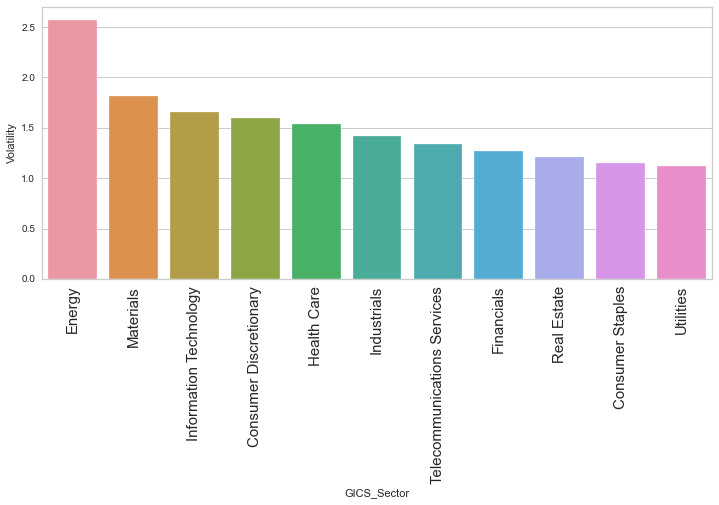

<IPython.core.display.Javascript object>

In [37]:
barplot_average(df, "GICS_Sector", "Volatility")

* The Energy Sector is the most volitile, with around 2.5 standard deviation of Volatility.
* The Materials Sector is the second most volitile, with around 1.7 standard deviation of volatility.
* The Utilities Sector is the less volitile, with around 1.2 standard deviation of volatility.

### GICS_Sector and ROE

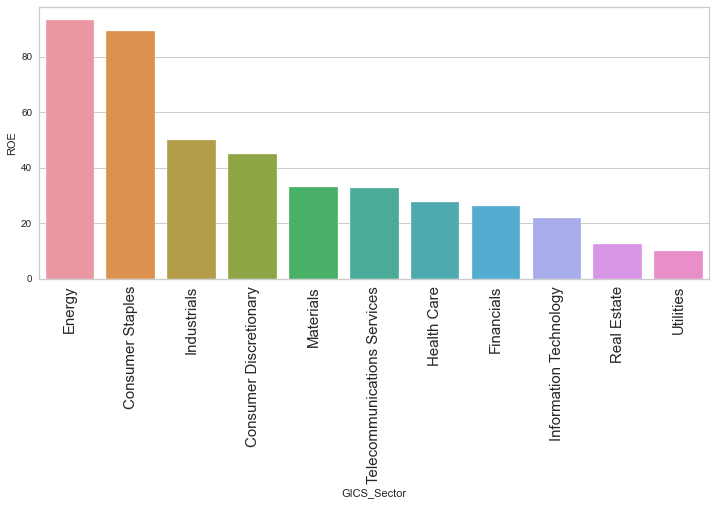

<IPython.core.display.Javascript object>

In [38]:
barplot_average(df, "GICS_Sector", "ROE")

* The Energy Sector has the highest ROE - Return on Equity, in average around 95 %.
* The Consumer Staples has an ROE in average around 90 %.
* The Utilities Sector has the lowest ROE, around 10 %.
* A good ROE for a specific company is the one that is equal to or just above the average for the company's sector.
* A common shortcut for investors is to consider a return on equity near the long-term average of the S&P 500 (14%) as an acceptable ratio and anything less than 10% as poor.

### GICS_Sector and Cash_Ratio
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

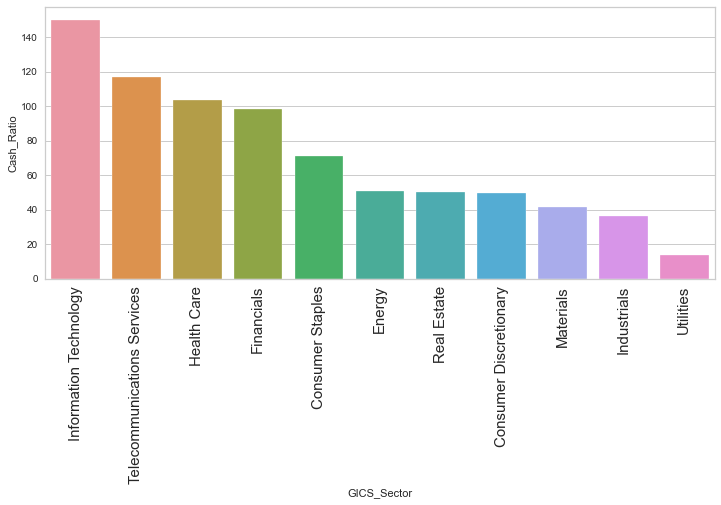

<IPython.core.display.Javascript object>

In [39]:
barplot_average(df, "GICS_Sector", "Cash_Ratio")

* The Information Technology Sector has the highest Cash Ratio, around 150 %.
* The Telecomunications Services Sector has a Cash Ratio of 118 % and the Health Care Sector has a Cash Ratio of just above 100 %.
* All the other sectors have a Cash Ratio lower than 100 %, meaning they have more liability than cash. This is not necessarily bad, it can indicate that a company is using the cash elsewhere to generate higher returns or return the money to shareholders instead of holding large amounts of cash on its balance sheet.
* The Utilities Sector has the lowest Cash Ratio, around 17 %.

### GICS_Sector and Net_Cash_Flow

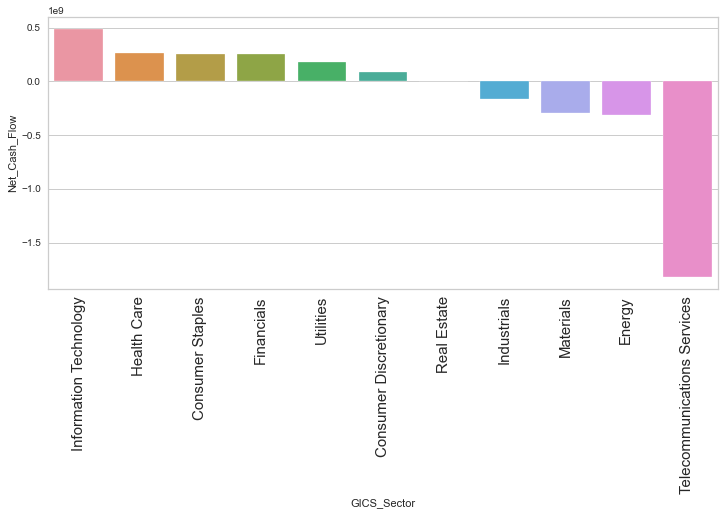

<IPython.core.display.Javascript object>

In [40]:
barplot_average(df, "GICS_Sector", "Net_Cash_Flow")

* The Sectors with positive Net Cash Flow are the Information Technology, Health Care, Consumer Staples, Financials, Utilities, Consumer Discretionary and Real Estate.
* The Information Technology Sector has the highest Net Cash Flow, USD 480 millions in average.
* The Sectors with negative Net Cash Flow are Industrials, Materials, Energy and Telecomunications Services.
* The Telecomunications Services Sector has the lowest Net Cash Flor, USD - 1.7 billions.
* Positive cash flow indicates that a company's liquid assets are increasing, enabling it to cover obligations, reinvest in its business, return money to shareholders, pay expenses, and provide a buffer against future financial challenges. It's practice to analyse Cash Flows using the cash flow statement. Investors are able to use it to determine how well a company can earn cash to pay its debts and manage its operating expenses.

### GICS_Sector and Net_Income

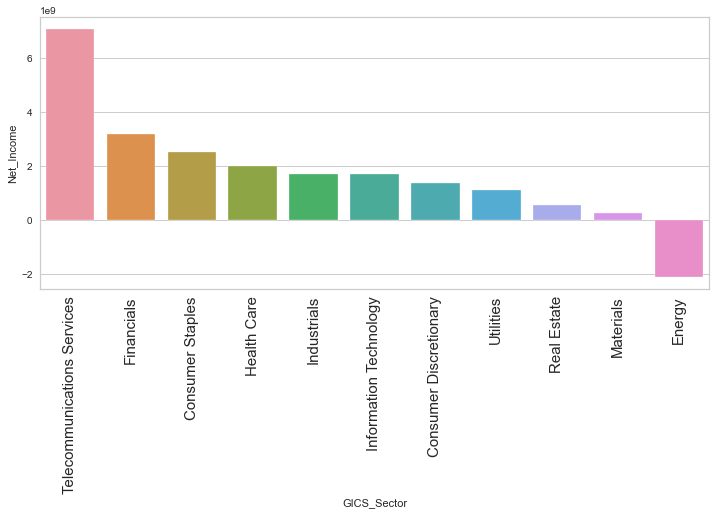

<IPython.core.display.Javascript object>

In [41]:
barplot_average(df, "GICS_Sector", "Net_Income")

* The Telecomunications Services Sector has the highest Net Income, an average of USD 7.5 billions.
* The Financial Sector has the second highest Net Income, an average of USD 3 billions (half of the Telecomunications income).
* All the Sectors with positive Net Income are profitable.
* The Energy Sector is the only one with a negative Net Income, an average of USD -2 billions. This can be the result of decline in sales, poor expense management, outdated technologies, excessive debt, or a poorly executed management strategy. This sector is not profitable.
* As we can see, the Telecomunications Services Sector has the lowest Cash Flow but a highest Net Income. Since this sector is still profitable, the low cash flow could be due to investiments or aquisitions. 

### GICS_Sector and Earnings_Per_Share

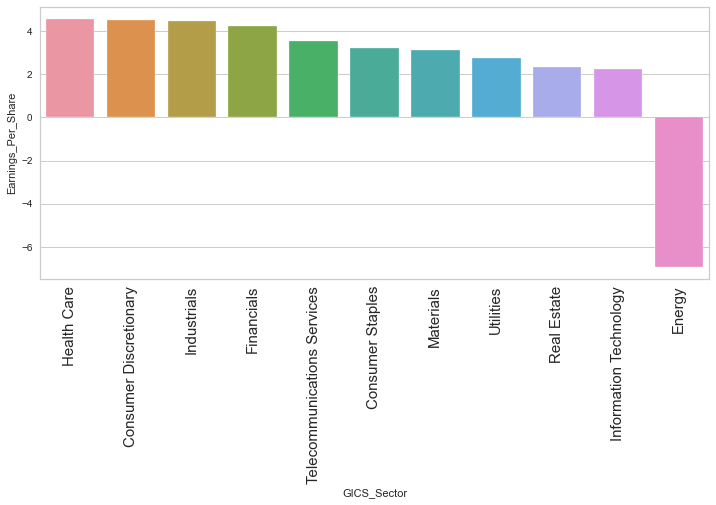

<IPython.core.display.Javascript object>

In [42]:
barplot_average(df, "GICS_Sector", "Earnings_Per_Share")

* The Sectors with the highest Earnings per Share are the Health Care, Consumer Discretionary, Industrials and Financials. They have an average Earnings per Share around USD 4. 
* The Sectors with a positive Earnings per Share are profitable, and the higher the value the better.
* The Energy Sector has a negative Earnings per Share, an average of USD -7. This sector is not profitable.

### GICS_Sector and Estimated_Shares_Outstanding

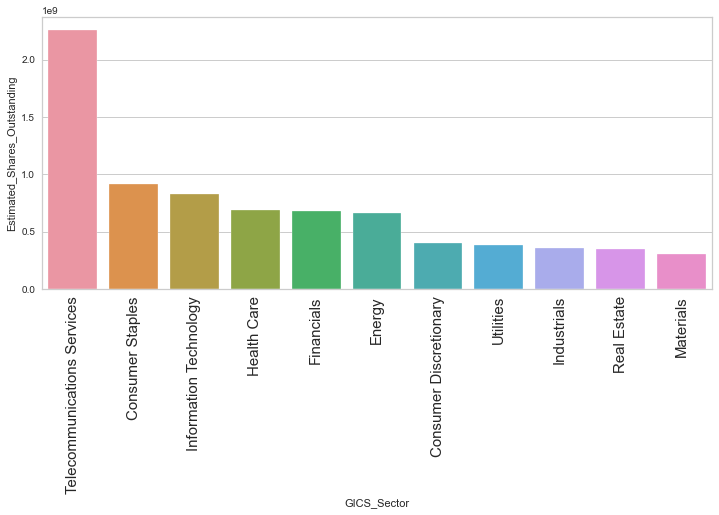

<IPython.core.display.Javascript object>

In [43]:
barplot_average(df, "GICS_Sector", "Estimated_Shares_Outstanding")

* The Telecomunications Services has the highest number of stock, an average of 2.2 billions of shares. It is well above of the other sectors.
* The Consumer Staples has an average of 800 millions shares.
* The Materials has the lowest number of stock, around 300 millions.

### GICS_Sector and P/E_Ratio
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

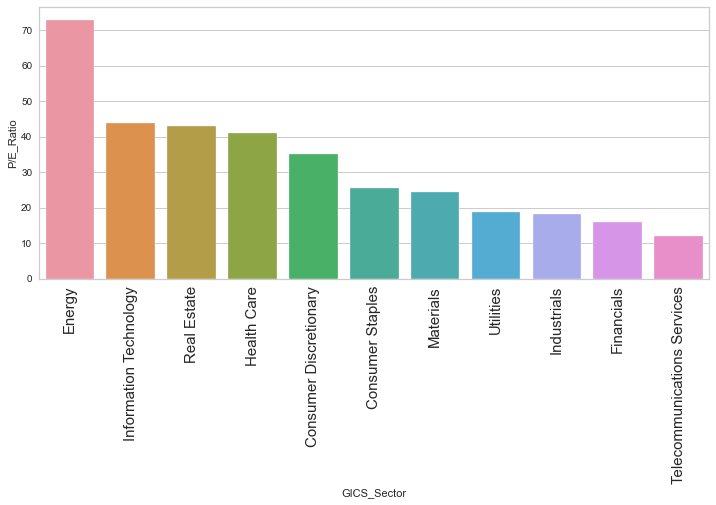

<IPython.core.display.Javascript object>

In [44]:
barplot_average(df, "GICS_Sector", "P/E_Ratio")

* The Energy sector has the highest Price to Earning Ratio, despite not being profitable. The investors are willing to pay in average USD 70 for USD 1 of current earnings. This ratio is way above the other sectors. We could say that this stocks are overvalued.
* The Information Technology and Real Estate Sectors have an average os 35 Price to Earning Ratio.
* The Telecomunications Services has the lowest P/E Ratio, and average of 12. As this sector is profitable and has a good Earning per Share, we could say that this sector stock is undervalued, and could be a good oportunity to investors. 

### GICS_Sector and P/B_Ratio

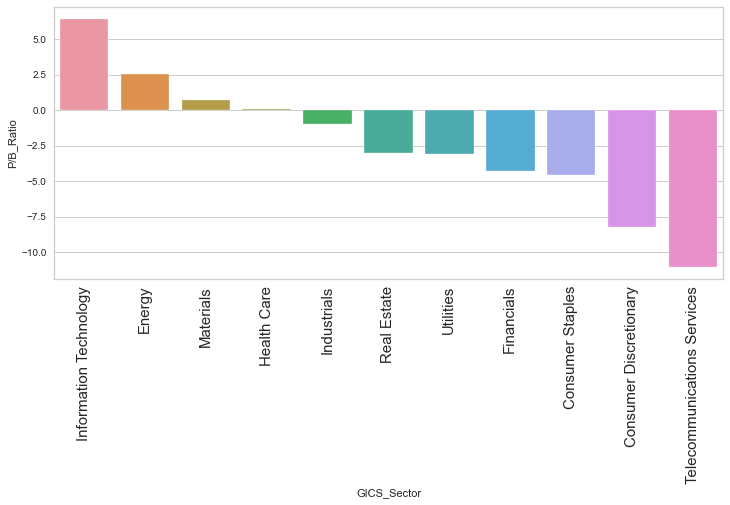

<IPython.core.display.Javascript object>

In [45]:
barplot_average(df, "GICS_Sector", "P/B_Ratio")

* The Information Technology has the highest Price to Book Ratio, an average of 6 and well above the second sector.
* P/B Ratio over 1 indicates companies with a high growth. Companies with P/B ratio well above 1 could be overvalued. Companies with P/B Ratio under 1 could be undervalued and could be a good investiment oportunity.
* The Information Technology sector is overvalued.
* The Health Care sector is undervalued and could be a good investiment, since it has a good ROE, good Cash Ratio of 100%, a positive Net Income and a good and not extremely high net cash flow.
* The sectors that have a negative P/B ratio are the ones with a book value per share that are negative, meaning they have more debts than assets. This could be because a company is investing or made aquisitions, or the company is on the verge of bankruptcy.
* Telecomunications Service had the lowest P/B ratio, lowest cash flow but highest net income, good earnings per share and the lowest P/E Ratio. It's and undervalued stock and a good investment oportunity.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier detection

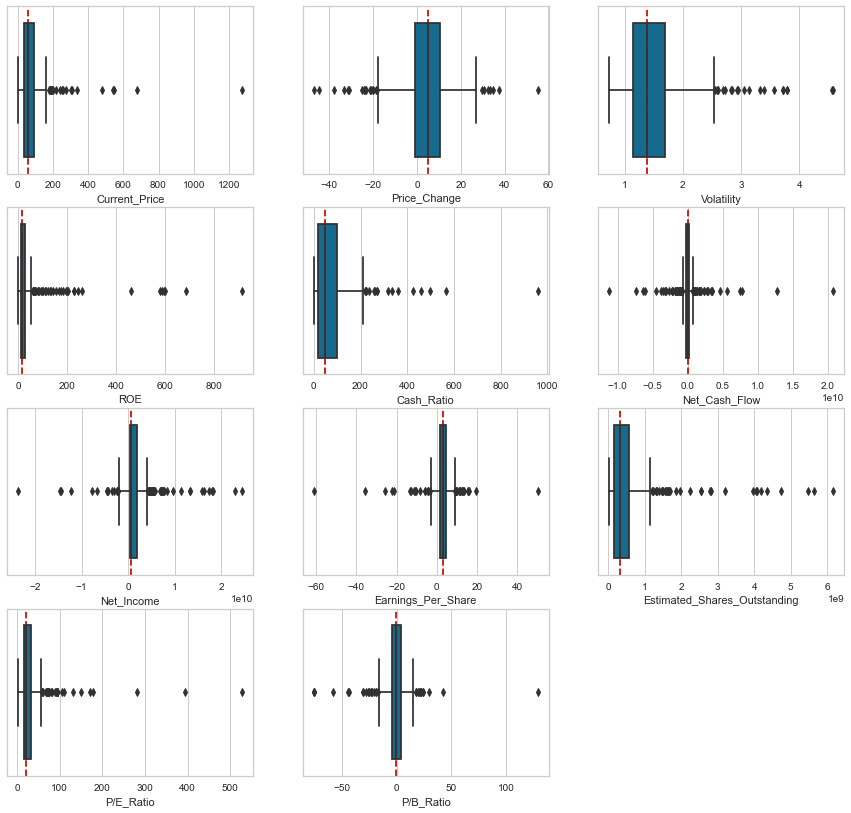

<IPython.core.display.Javascript object>

In [46]:
# Let's check the outliers there are outside 1.5 IQR (boxplot method )

# creating a list with the numeric variables
num_col = df.select_dtypes(include="number").columns.tolist()

# Let's plot the boxplot of the numerical features to check for outliers
# The median is the red line

plt.figure(figsize=(15, 40))

for i in range(len(num_col)):
    plt.subplot(11, 3, i + 1)
    sns.boxplot(data=df, x=num_col[i])
    plt.xlabel(num_col[i])
    median = df[num_col[i]].median()
    plt.axvline(median, color="r", linestyle="--")

* There are a lot of outliers in all the numerical variables. This seems to be real values in the stock market, so we are not going to treat them.

### Scaling the dataset 

In [47]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [48]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

### Selecting K with Elbow Method

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.183721795317749
Number of Clusters: 5 	Average Distortion: 2.134877862735355
Number of Clusters: 6 	Average Distortion: 2.0870696738936187
Number of Clusters: 7 	Average Distortion: 2.0095124473733272
Number of Clusters: 8 	Average Distortion: 2.0076850619068645
Number of Clusters: 9 	Average Distortion: 1.9409273120774937
Number of Clusters: 10 	Average Distortion: 1.8575739344096802
Number of Clusters: 11 	Average Distortion: 1.8037678753783868


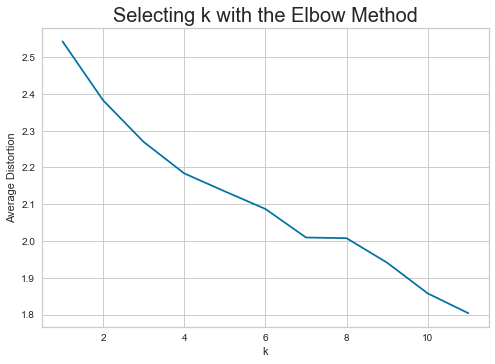

<IPython.core.display.Javascript object>

In [49]:
# Let's create 11 clusters
# Let's calculates the distortion with Euclidean distance (the mean of the distances of each point to its centroid)
# Let's build the K-means Elbow plot and choose the number of cluster in the point where the distortion declines most

clusters = range(1, 12)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

* The value of k from the Elbow curve seems to be between 5, 6 or 7.

### Silhouette Score 

**Let's check the silhouete score for our clusters, from 2 to 11 clusters.**

For n_clusters = 2, silhouette score is 0.44600165785164264
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.44666728694966346
For n_clusters = 5, silhouette score is 0.40598156814901215
For n_clusters = 6, silhouette score is 0.39507327193094854
For n_clusters = 7, silhouette score is 0.413033184567041
For n_clusters = 8, silhouette score is 0.4143420508969727
For n_clusters = 9, silhouette score is 0.2271922292801963
For n_clusters = 10, silhouette score is 0.12687293892142482
For n_clusters = 11, silhouette score is 0.17119387631407013


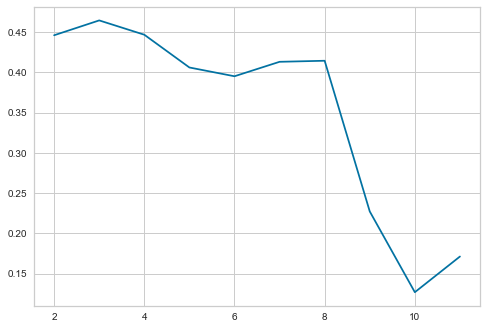

<IPython.core.display.Javascript object>

In [50]:
sil_score = []
cluster_list = list(range(2, 12))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

* The Silhouette Score for 5 and 6 have almost the same value.

**The Silhouette Score for 5 clusters is a little bit higher, and seems a good value.**

### Find optimal number of clusters with Silhouette Coefficients

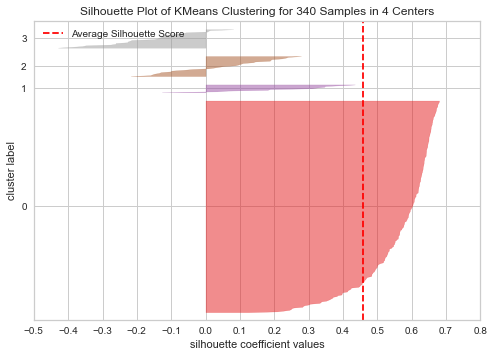

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [51]:
# Number of Clusters = 4
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

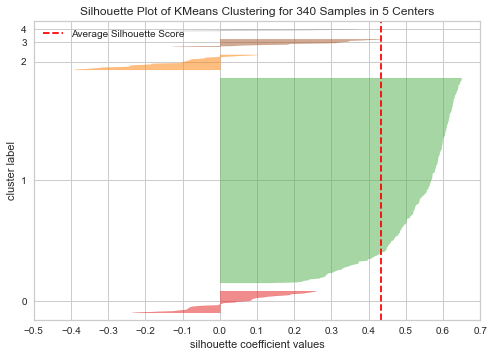

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [52]:
# Number of Clusters = 5
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

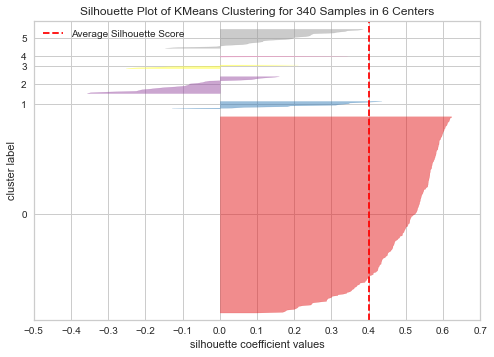

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [53]:
# Number of Clusters = 6
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

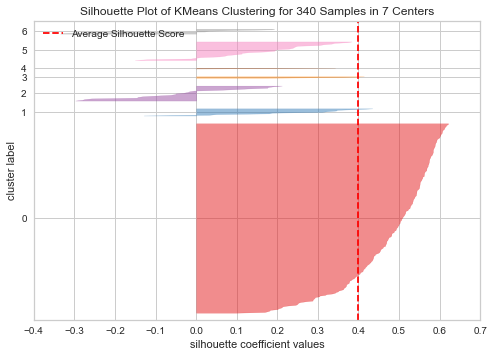

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [54]:
# Number of Clusters = 7
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Let's take 5 as the optimal number of clusters, as the silhouete score is a litte bit higher and each of the cluster is close enough to the average silhouette value.** 

* Despite of the increase in the number of clusters, one of the clusters always have a lot of data, it's not separating in another cluster. Increasing the number of clusters is only forming clusters with small number of data.
* Some of the clusters have a negative silhouette score, which means our model is not able to separate all the points.

### Creating our K-means final model

In [55]:
# Creating our K-means model
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

<IPython.core.display.Javascript object>

In [56]:
# Creating a new dataset
df_kmeans = df.copy()

<IPython.core.display.Javascript object>

In [57]:
# adding kmeans cluster labels to the original dataframe
df_kmeans["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

### Cluster profiling

In [58]:
# Let's group our clusters and find the average value of each variable
kmeans_cluster_profile = df_kmeans.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [59]:
# Let's count the number of companies in each cluster
kmeans_cluster_profile["count_in_each_segment"] = (
    df_kmeans.groupby("K_means_segments")["ROE"].count().values
)

<IPython.core.display.Javascript object>

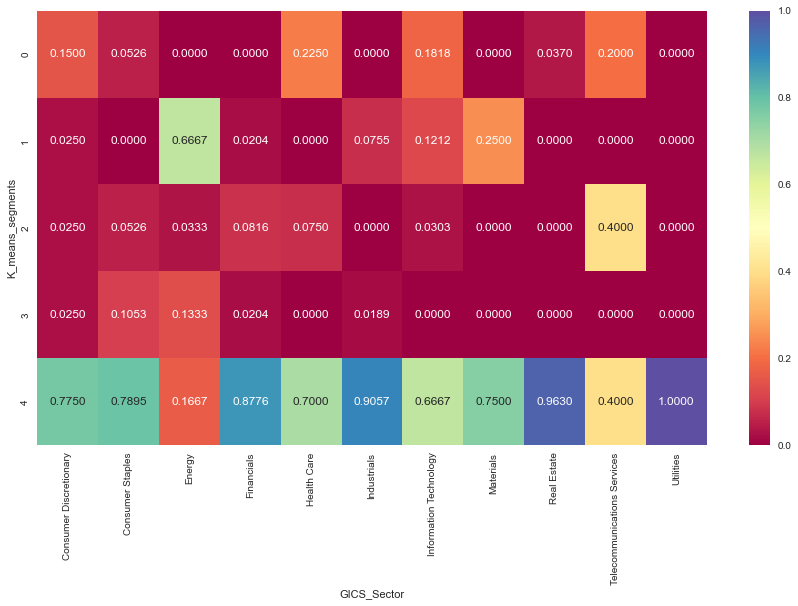

<IPython.core.display.Javascript object>

In [60]:
# let's check how many of each sector are in each cluster
plt.figure(figsize=(15, 8))

sns.heatmap(
    pd.crosstab(
        index=df_kmeans["K_means_segments"],
        columns=df_kmeans["GICS_Sector"],
        normalize="columns",
    ),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.show()

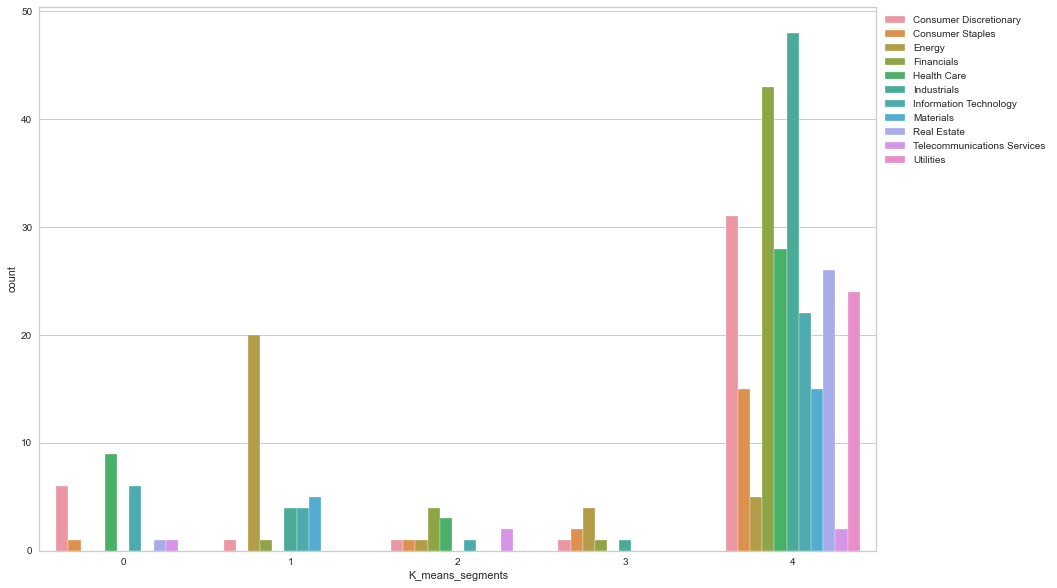

<IPython.core.display.Javascript object>

In [61]:
# let's check how many of each sector are in each cluster
plt.figure(figsize=(15, 10))
sns.countplot(data=df_kmeans, hue="GICS_Sector", x="K_means_segments")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* The cluester 1 has a lot of companies from the Energy Sector.
* The other clusters have a mix of sectors.

In [62]:
# let's see the names of the companies in each cluster
for cl in df_kmeans["K_means_segments"].unique():
    print(
        "The",
        df_kmeans[df_kmeans["K_means_segments"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df_kmeans[df_kmeans["K_means_segments"] == cl]["Company"].tolist())
    print("-" * 100, "\n")

The 259 companies in cluster 4 are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar Inc.', 'Chubb Limited', 'CBRE Group', 'Crown Castle International Corp.', 'Carnival Corp

<IPython.core.display.Javascript object>

In [63]:
# let's display cluster profiles
kmeans_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,246.574304,14.284326,1.769621,26.500000,279.916667,459120250.000000,1009205541.666667,6.167917,549432140.538333,90.097512,14.081386,24
1,41.373681,-14.849938,2.596790,27.285714,64.457143,34462657.142857,-1293864285.714286,-2.459714,450100420.905143,61.563930,2.476202,35
2,48.103077,6.053507,1.163964,27.538462,77.230769,773230769.230769,14114923076.923077,3.958462,3918734987.169230,16.098039,-4.253404,13
3,72.783335,0.912232,2.015435,542.666667,34.000000,-350866666.666667,-5843677777.777778,-14.735556,372500020.988889,53.574485,-8.831054,9
4,72.768128,5.701175,1.359857,25.598456,52.216216,-913081.081081,1537660934.362934,3.719247,436114647.527683,23.473934,-3.374716,259


<IPython.core.display.Javascript object>

Boxplot of numerical variables for each cluster


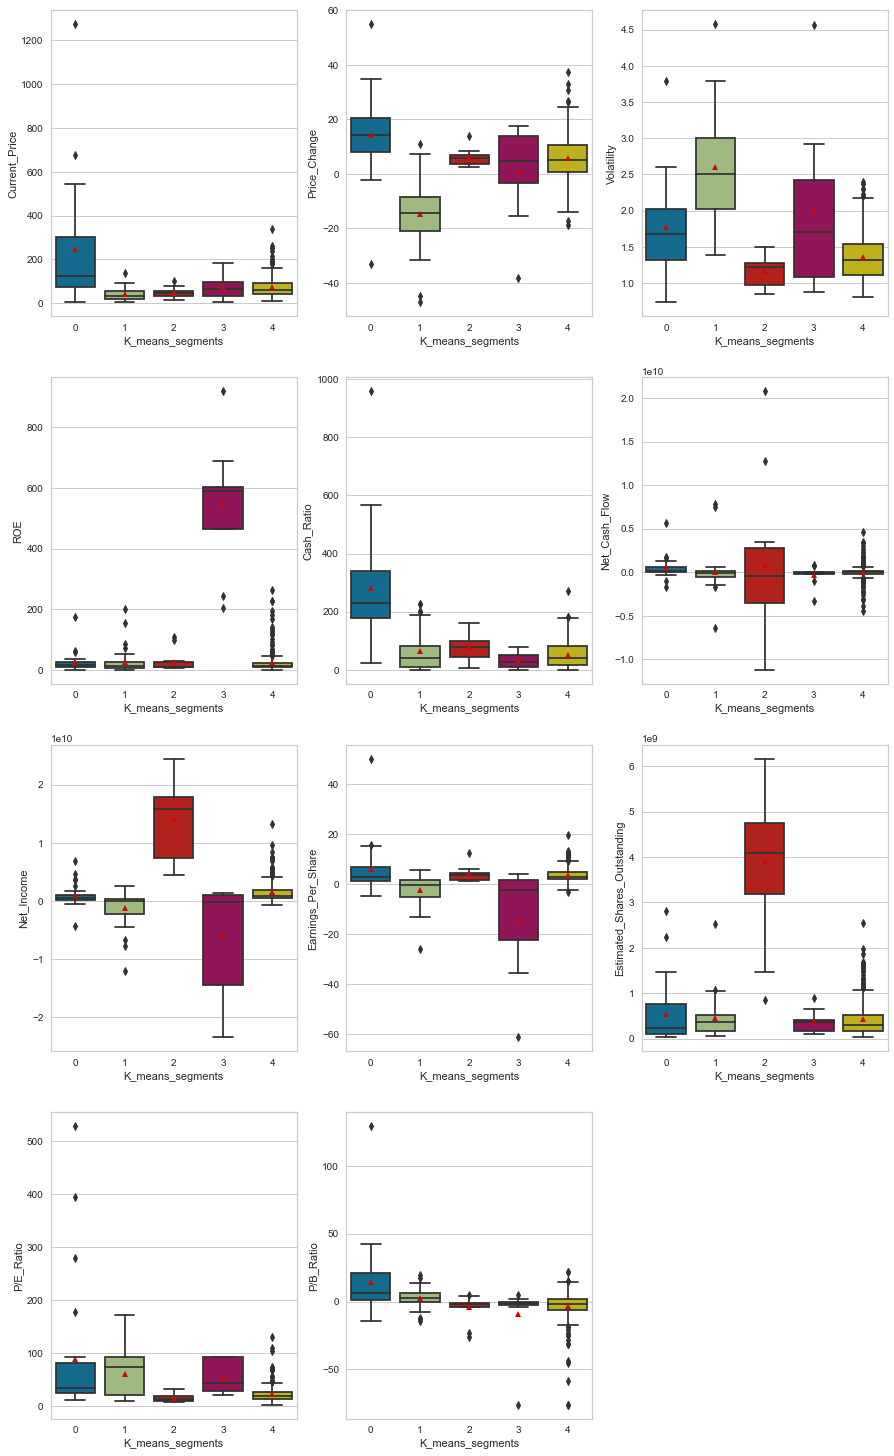

<IPython.core.display.Javascript object>

In [64]:
# Let's see the distribution of the variables in each cluster

print("Boxplot of numerical variables for each cluster")

plt.figure(figsize=(15, 80))

for i in range(11):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(
        data=df_kmeans, y=num_col[i], x="K_means_segments", showmeans=True), #showfliers=False)


Barplot of numerical variables for each cluster


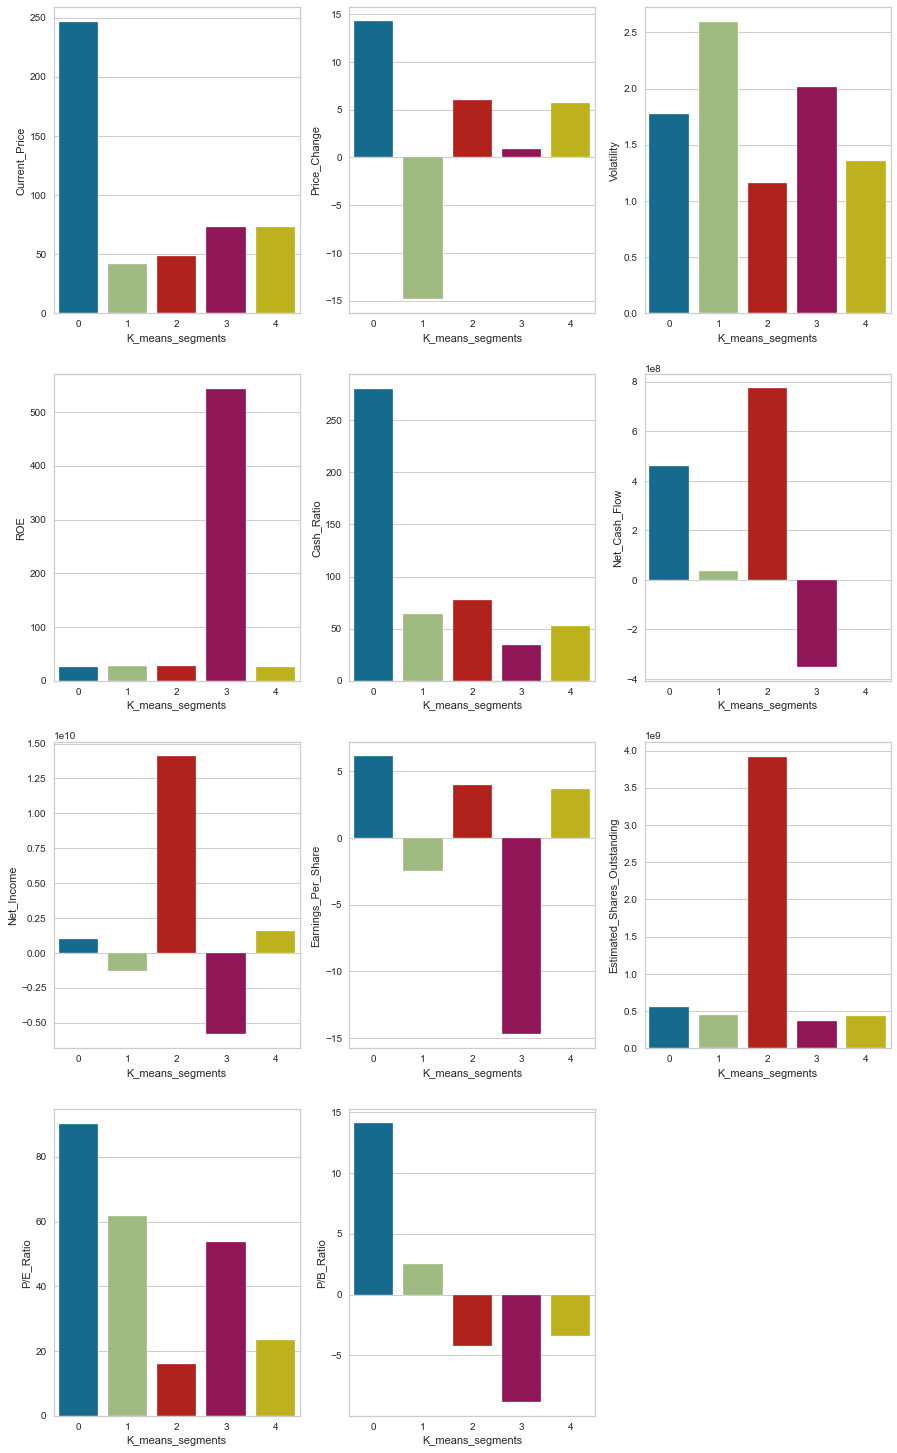

<IPython.core.display.Javascript object>

In [65]:
# Let's visualize the average value of the variables in each cluster

print("Barplot of numerical variables for each cluster")

plt.figure(figsize=(15, 80))

for i in range(11):
    plt.subplot(12, 3, i + 1)
    sns.barplot(data=df_kmeans, y=num_col[i], x="K_means_segments", ci=None)

### Insights

- **Cluster 0**:
    - It has 24 companies.
    - The Health Care, Information Technology and Telecomunications Service sectors are the main sectors in this cluster.
    - Some of the companies in this cluster are Amazon, Netflix, Facebook, Biogen, Regeneron, Chiplotle, McDonald's.
    - The majority of the companies in this cluster are young and are growing fast. 
    - The companies in this group have the highest stock price and the highest positive price change, but the volatility is moderate.
    - The ROE, Return on Equity, is very similar to all the other clusters, arount 25%, excluding the cluster 3.
    - The Cash Ratio is the highest, well above 100% and well above the other clusters. This companies could have a lot of cash and are not utilizing it efficiently, investing in profitable projects for example.
    - The Net Cash Flow is high and the Net Income it is high as well.
    - The average Earnings per Share is the highest, this companies are profitable.
    - This cluster have some companies with moderate number of stocks and some companies with a high number of stocks.
    - The average P/E Ratio is the highest, which means the investors are expecting grow in the future. The investors are willing to pay USD 90 for USD 1 of earnings.
    - The P/B Ratio is the highest, well above 1. This companies have a high growth and are a solid investiment, but they are overvalued.
    - This cluster have companies that have grown and are a solid investiment. Considering that the stock price is high and the volatility is moderate the investors should buy it for a long-term investiment, not expecting the stock price to grow much more. 
    

- **Cluster 1**:
    - It has 35 companies.
    - The Energy sector is the main sector in this cluster, with a small portion of the Material sector.
    - Some of the companies in this cluster are Baker Hughes, Cabot, Murphy Oil, Occidental, Kinder Morgan, Hewlett Packard.
    - This are big traditional companies.
    - The stock price is the lowest and the price change is negative -15%.
    - The volatility is the highest one.
    - The ROE, Return on Equity, is very similar to all the other clusters, arount 25%, excluding the cluster 3.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example.
    - The Net Cash Flow is positive but very low in average.
    - For half of the companies the Net Income is negative and the Earnings per Share is negative. For the other half the Net Income and the Earnings per Share are positive but low. This cluster is not profitable.
    - This cluster have some companies with moderate number of stocks and some companies with a high number of stocks.
    - The P/E Ratio is high. The stocks are overvalued, if we take in consideration that the earnings per share are negative for some companies.
    - The P/B Ratio is above 1  and positive for 75% of the companies, but for 25% of the companies the P/B ratio is negative, which could indicate that a company is on the verge of bankruptcy.
    - This cluster have companies that are not profitable, with high volatility and a stock price that is falling. The stocks of this companies are overvalued. Considering that the Net Income is negative but not so low and considering that the P/B ratio and P/E ratio are still positive in average,  this losses in the Net Income could be recent. The investors should wait some more months and analyse the numbers again before investing in this cluster.
    

- **Cluster 2**:

    - It has 13 companies.
    - The Telecomunications Services sector has a lot of its companies in this cluster. Some other sectors in this cluster are Financials, Health Care and Consumer Staples.
    - Some of the companies in this cluster are Intel, Verizon, AT&T, Pfizer, Merck, Coca Cola, Bank of America, Citigroup, Ford.
    - The stock price is low and the price change is positive but not too big.
    - The volatility is the lowest one.
    - The ROE, Return on Equity, is very similar to all the other clusters, arount 25%, excluding the cluster 3.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example.
    - The Net Cash Flow is the highest one. 
    - The Net Income is the highest one, this companies are extremely profitable.
    - The Earnings per Share is around USD 4, which is a really good value when we consider that this companies have the highest number of stocks.
    - The P/E Ratio is the lowest. Considering that this companies are very profitable, this is a bargain to the investors, a good oportunity to buy a undervalued stock.
     - The P/B Ratio is negative. Considering that this companies are extremely profitable, this P/B ratio negative could be because the companies have made loans for investiments. 
     - This cluster have companies that are extremely profitable, with a low and undervalued stock price. This companies seems to be growing fast. This is a good oportunity for investors.
     
     
- **Cluster 3**:

    - It has 9 companies. This is our smaller cluster.
    - This cluster has only 5 sectors, Consumer Discretionary, Staples, Energy, Financials and Industrials.
    - Some of the companies in this cluster are Colgate-Palmolive, Allegion, Chesapeake Energy, Devon Energy, Kimberly-Clark.
    - The stock price is the normal market price and the price change is the smallest. We can say the stock price almost didn't change.
    - The volatility is high.
    - The ROE, Return on Equity, is extremely high, around 500%. Since the Net Income is negative, for the ROE to be high and positive, the shareholders equity needs to be negative as well. Which means this companies have debts that surpasse the companies assets.  
    - The Net Income is negative, extremely low. This companies are not profitable.
    - The Cash Ratio is the lowest one, around 30% which means this companies have way more liabilities than cash.
    - The Net Cash Flow is extremely negative, another indicator that the companies have a lot of debts. 
    - The Earnings per Share are negative and extremely low, this companies are not profitable.
    - This companies have the lowest number of stocks, when compared to the other clusters, but the difference is not so big.
    - The P/E Ratio is high. Considering that the earnings per share is negative, these companies stock are overvalued.
    - The P/B Ratio is negative, the lowest one. This means the book value of the companies are negative, the companies have more liabilities than assets. This could indicate that the companies are insolvent or on the verge of bankruptcy. 
    - This cluster have companies that are not profitable, with more liabities than assets. The stocks are overvalued. This companies could be bankrupt. The investors should not invest in this companies.


- **Cluster 4**:

    - It has 259 companies. It's the biggest cluster.
    - It has big traditional companies like American Airlines, Boeing, Cigna, Quest, Marriot, General Motors.
    - All the Economic Sectors are part of this cluster, but the Energy sector has very few companies in this sector. The Telecomunications Services has few companies in this sector. All the Utilities companies are in this sector.
    - The stock price is the normal market price, around USD 70.
    - The price change is positive and low.
    - The volatility is low.
    - The ROE, Return on Equity, is very similar to all the other clusters, arount 25%, excluding the cluster 3.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example. 
    - The average Net Cash Flow is around zero, which could means the companies are administering well the incomes and investiments. 
    - The Net Income is positive and the Earnings per Share is positive, this companies are profitable.
    - This companies have in average the same number of stocks as the other clusters, except cluster 2.
    - The P/E Ratio is around USD 20. It's not a high value. The stock price is not overvalued.
    - Half o the companies in this cluster have a positive low P/B Ratio, this could be a good investiment opportunity to buy undervalued stocks. 
     - The other half of the companies in this cluster have a negative P/B Ratio. Considering that this companies are profitable, this P/B ratio negative could be because the companies have made loans for investiments. 
     - This cluster have companies that are profitable, but the net income and earnings per share is low. This companies have a low positive price change. All this factors could indicate a low steady grow. The investors could choose the companies in this cluster that have a low but positive P/B ratio to invest. This investment should be long term.

## Hierarchical Clustering

* We already have our numerical variables scaled in the dataframe subset_scaled_df.
* We are going to build a variety of dendograms with different distance metrics and linkange methods.
* We are going to check the Cophenetic correlation for each dendogram. The highest the Cophenectic correlation the better.
* We are going to visualize the dendograms and choose the one with the highest Cophenetic correlation. Than we will choose the number of clusters for that dendogram.
* We will check the cluster profile. If the clusters don't have enough variability we are going to choose another dendogram.

In [66]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(
            subset_scaled_df, metric=dm, method=lm
        )  # z is our dendogram, our clustering
        c, coph_dists = cophenet(
            Z, pdist(subset_scaled_df)
        )  # z give the dendogram distance, pdist gives the pairwise distance
        # we use z and pdist to calculate cophenet correlation and cophenet distance
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [67]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

#### Let's explore different linkage methods with Euclidean distance only.

In [68]:
# We are checking Euclidean distance separate because ward and centroid just work for Euclidean distance,
# they dont work for "chebyshev", "mahalanobis", "cityblock"

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print(
        "Cophenetic correlation for Euclidean distance and {} linkage is {}.".format(
            lm, c
        )
    )
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314012446828154.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [69]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation for Euclidean distance
print(
    "Highest cophenetic correlation for Euclidean distance is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation for Euclidean distance is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for different distance metrics and linkage methods.**

### Dendograms for Euclidean distance

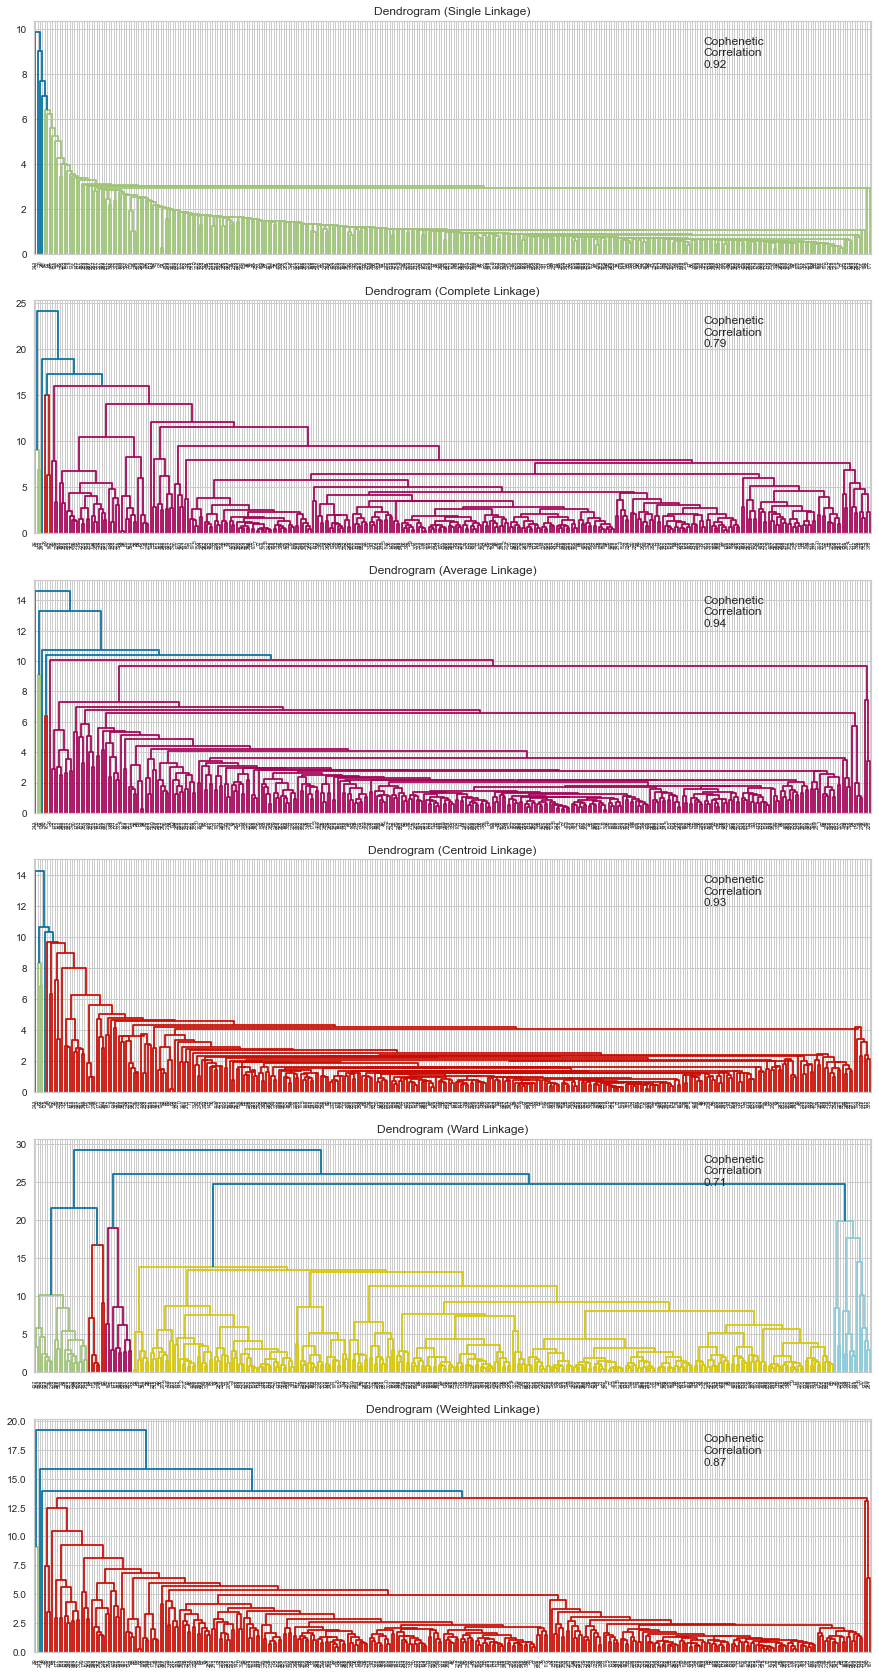

<IPython.core.display.Javascript object>

In [70]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [71]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.923
1,complete,0.787
2,average,0.942
3,centroid,0.931
4,ward,0.710
5,weighted,0.869


<IPython.core.display.Javascript object>

* The dendogram with Ward linkage has the lowest cophenetic coefficient, but shows more separate clusters.

### Dendograms for Chebyshev, Mahalanobis and Manhattan distance
* Let's check the dendogram for this distances with average, single and weighted linkage methods, as they gave high cophenetic correlation values.

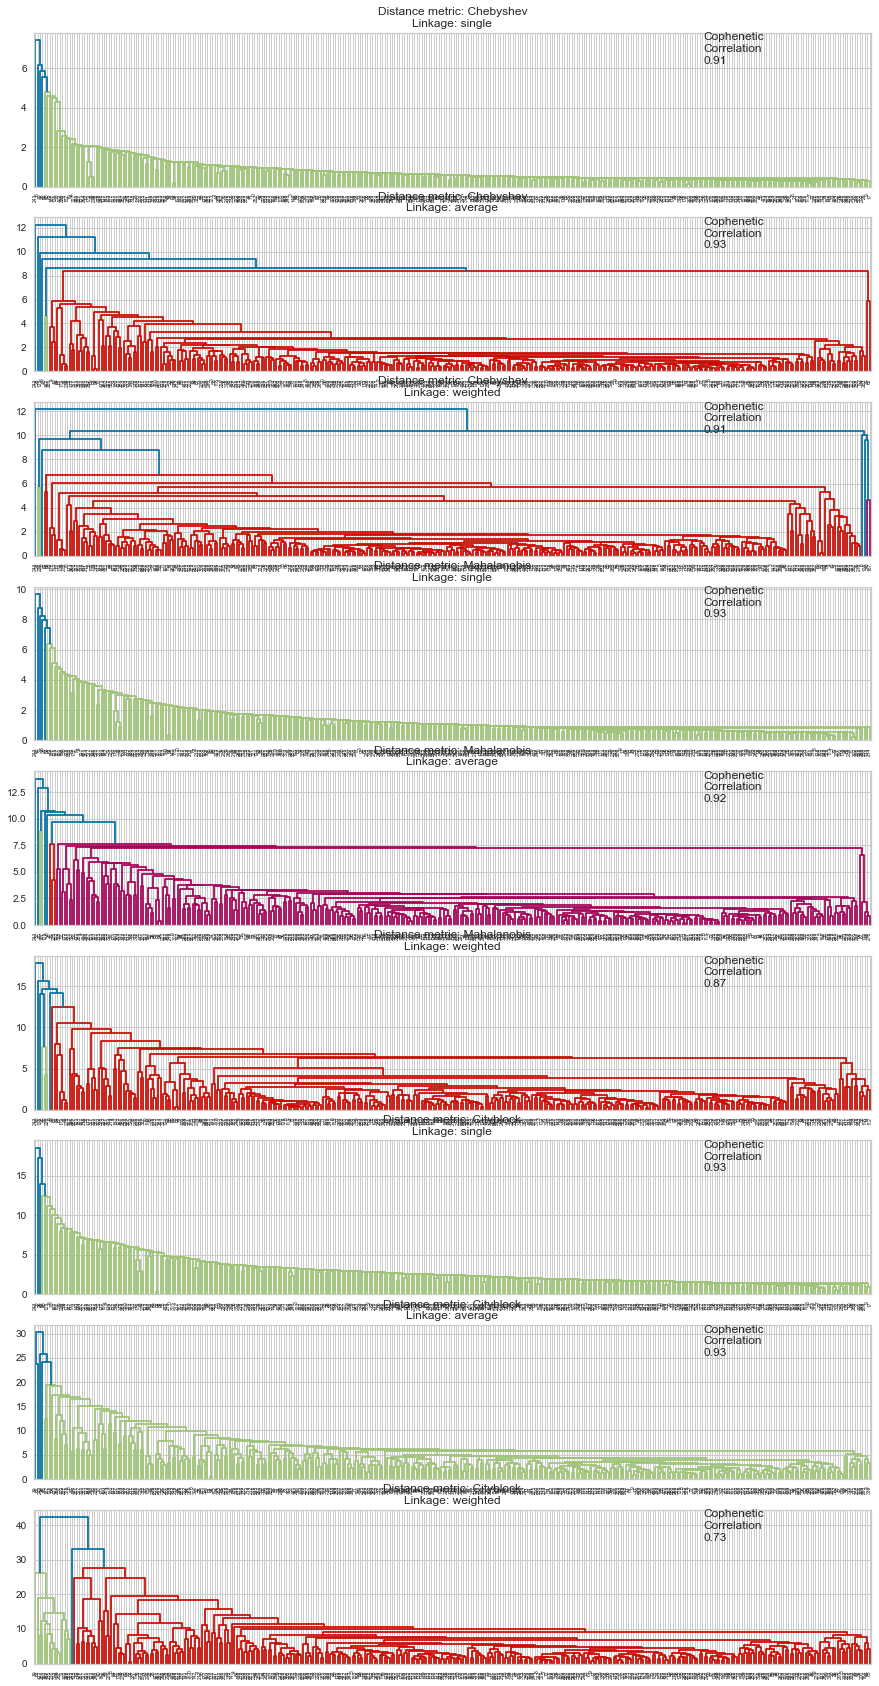

<IPython.core.display.Javascript object>

In [72]:
# list of distance metrics
distance_metrics = ["chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) * len(linkage_methods), 1, figsize=(15, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

* The dendogram with Cityblock (Manhattan) distance and weighted linkage shows some distinct and separate clusters, but they are not as distinct as the dendogram with Euclidean distance and Ward linkage.

* Out of all the dendrograms we saw, the dendrogram with  Euclidean distance and Ward linkage gave us the more separate and distinct clusters.
* 5 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.

### Creating our final Hierachical model with 5 clusters 

In [73]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=5)

<IPython.core.display.Javascript object>

In [74]:
# Creating a new dataset
df_HC = df.copy()

<IPython.core.display.Javascript object>

In [75]:
# adding hierarchical cluster labels to the original dataframe
df_HC["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster profiling

In [76]:
# Let's group our clusters and find the average value of each variable
HC_cluster_profile = df_HC.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [77]:
# Let's count the number of companies in each cluster
HC_cluster_profile["count_in_each_segment"] = (
    df_HC.groupby("HC_Clusters")["ROE"].count().values
)

<IPython.core.display.Javascript object>

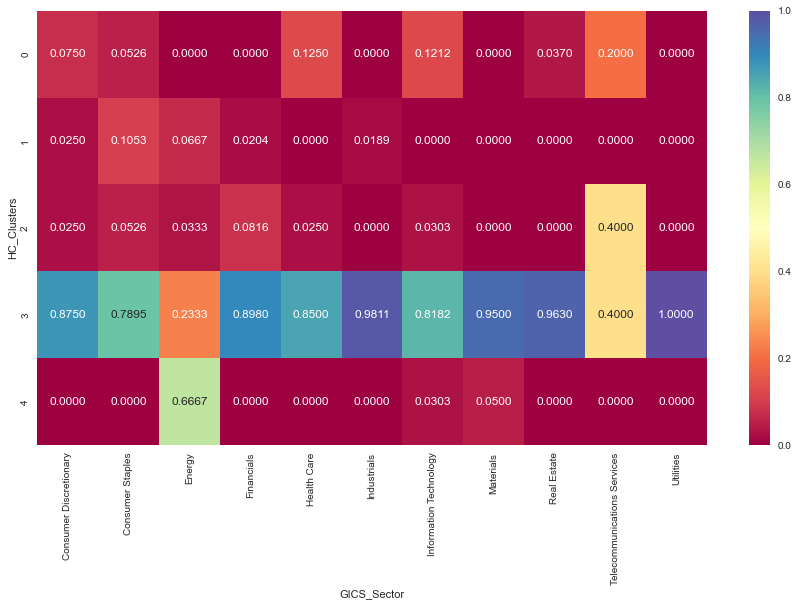

<IPython.core.display.Javascript object>

In [78]:
# let's check how many of each sector are in each cluster
plt.figure(figsize=(15, 8))

sns.heatmap(
    pd.crosstab(
        index=df_HC["HC_Clusters"],
        columns=df_kmeans["GICS_Sector"],
        normalize="columns",
    ),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.show()

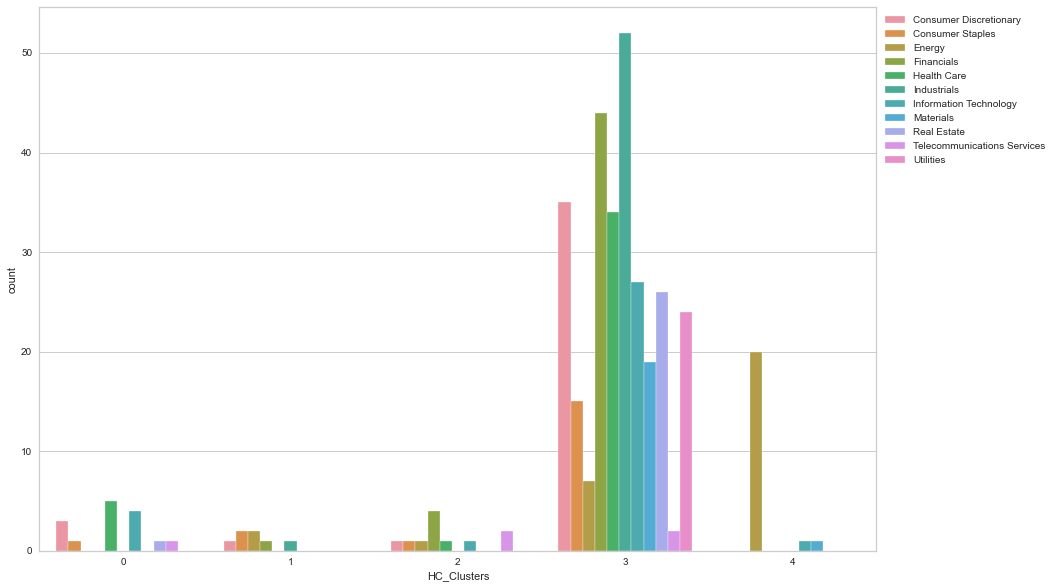

<IPython.core.display.Javascript object>

In [79]:
# let's check how many of each sector are in each cluster
plt.figure(figsize=(15, 10))
sns.countplot(data=df_HC, hue="GICS_Sector", x="HC_Clusters")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* The cluester 4 has a lot of companies from the Energy Sector.
* The other clusters have a mix of sectors.

In [80]:
# let's see the names of the companies in each cluster
for cl in df_HC["HC_Clusters"].unique():
    print(
        "The",
        df_HC[df_HC["HC_Clusters"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df_HC[df_HC["HC_Clusters"] == cl]["Company"].tolist())
    print("-" * 100, "\n")

The 285 companies in cluster 3 are:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'BIOGEN IDEC Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar In

<IPython.core.display.Javascript object>

In [81]:
# let's display cluster profiles
HC_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
HC_Clusters,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


<IPython.core.display.Javascript object>

Boxplot of numerical variables for each cluster


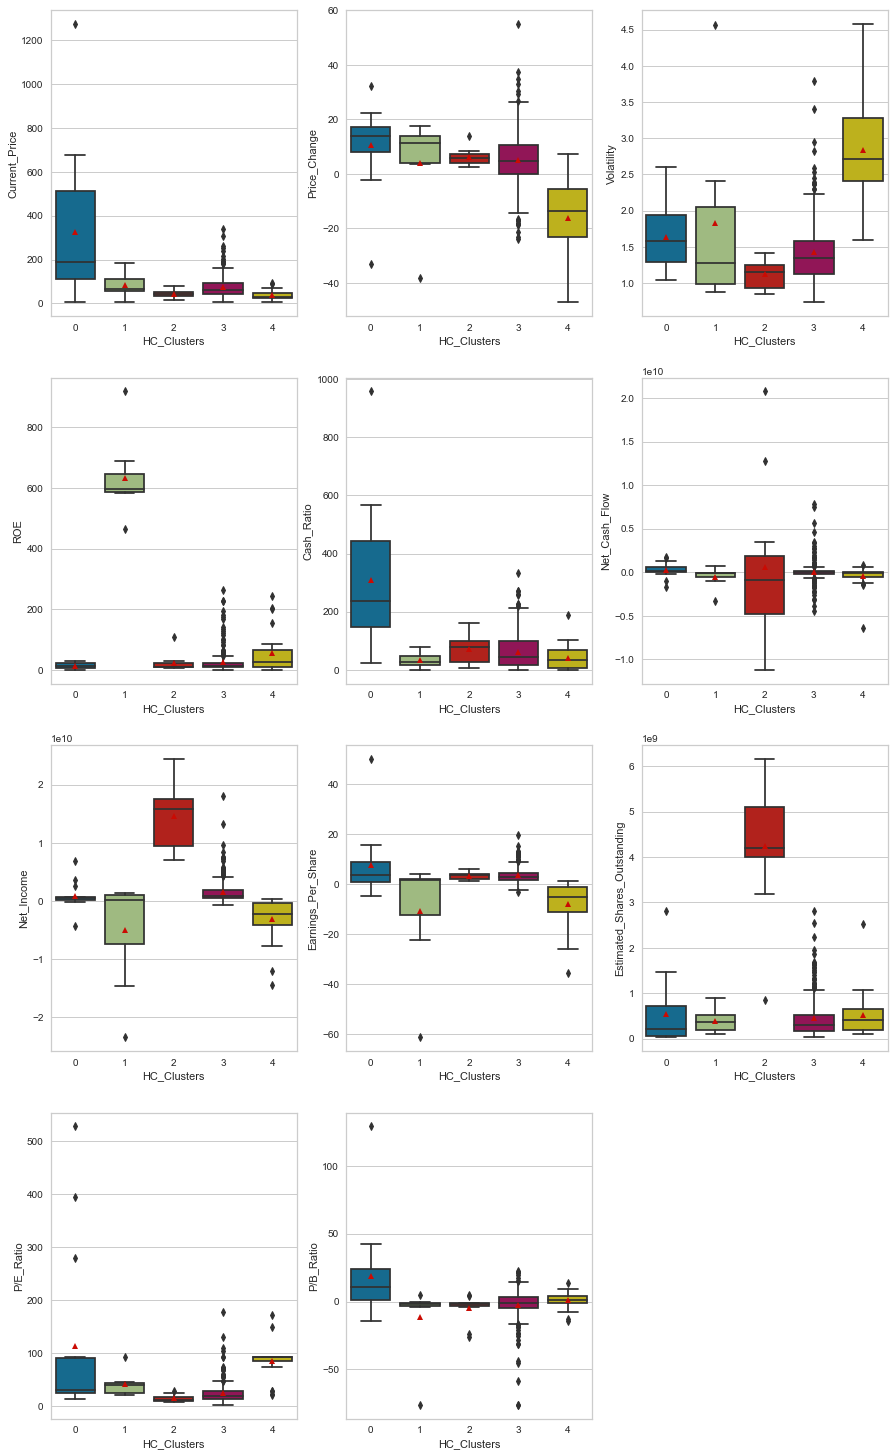

<IPython.core.display.Javascript object>

In [82]:
# Let's see the distribution of the variables in each cluster

print("Boxplot of numerical variables for each cluster")

plt.figure(figsize=(15, 80))

for i in range(11):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(
        data=df_HC, y=num_col[i], x="HC_Clusters", showmeans=True), #showfliers=False)


Barplot of numerical variables for each cluster


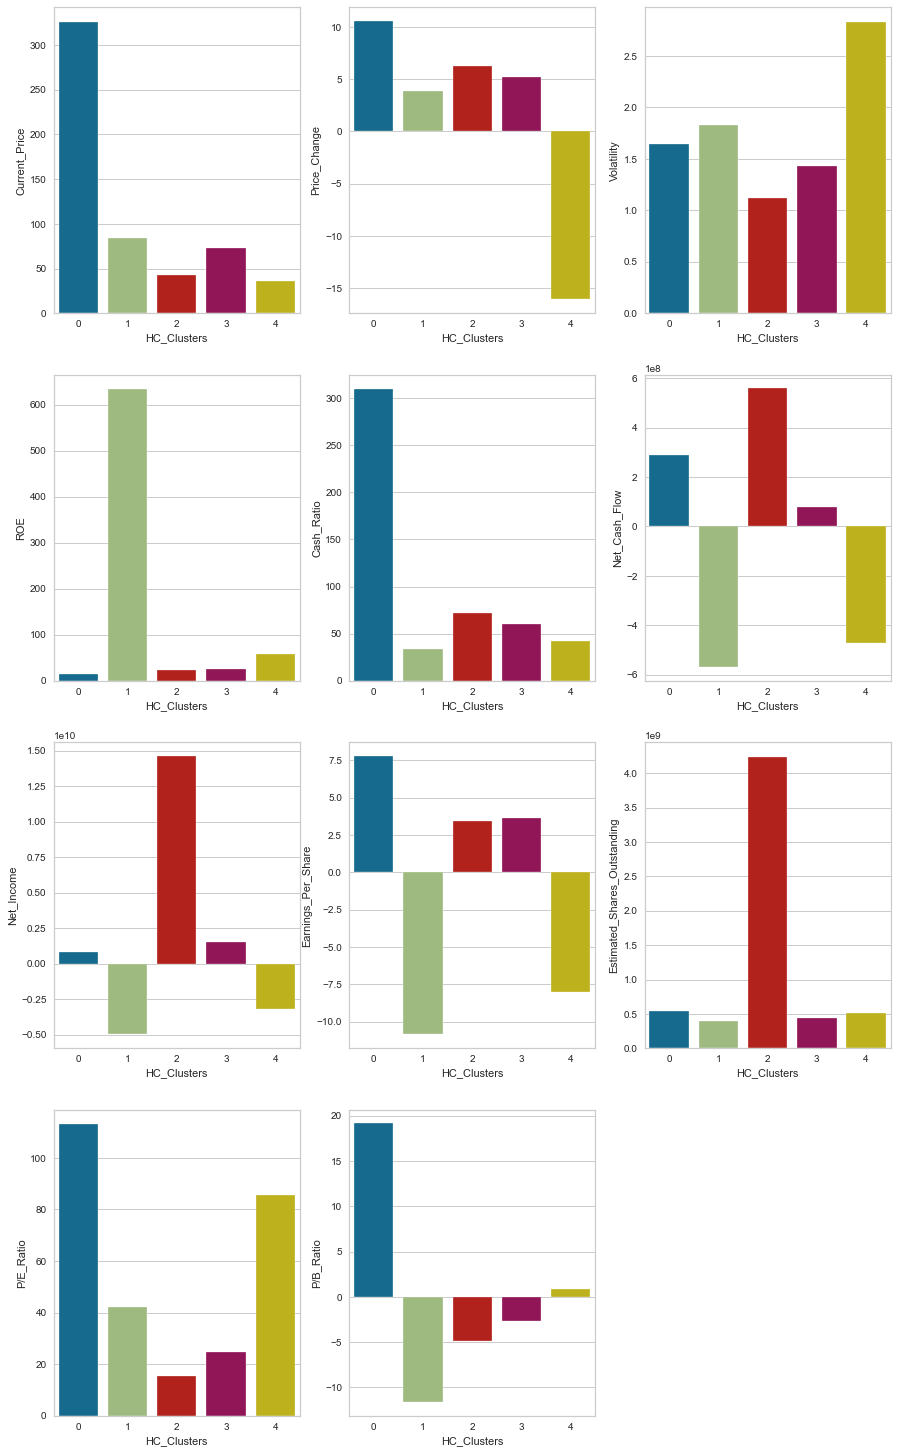

<IPython.core.display.Javascript object>

In [83]:
# Let's visualize the average value of the variables in each cluster

print("Barplot of numerical variables for each cluster")

plt.figure(figsize=(15, 80))

for i in range(11):
    plt.subplot(12, 3, i + 1)
    sns.barplot(data=df_HC, y=num_col[i], x="HC_Clusters", ci=None)

### Insights

- **Cluster 0**:
    - It has 15 companies.
    - The Health Care, Information Technology and Telecomunications Services sectors are the main sectors in this cluster.
    - Some of the companies in this cluster are Amazon, Netflix, Facebook, Alexion Pharmaceuticals, Regeneron, Chiplotle.
    - The majority of the companies in this cluster are young and are growing fast. 
    - The companies in this group have the highest stock price and the highest positive price change, but the volatility is moderate.
    - The ROE, Return on Equity, is the lowest, 14% in average.
    - The Cash Ratio is the highest, well above 100% and well above the other clusters. This companies could have a lot of cash and are not utilizing it efficiently, investing in profitable projects for example. Or this companies have very low liabilities.
    - The Net Cash Flow is high. Perhaps this companies have low debts.
    - The Net Income is positive, but low when compared to the other clusters.
    - The average Earnings per Share is the highest, this companies are profitable.
    - This cluster have some companies with moderate number of stocks and some companies with a high number of stocks.
    - The average P/E Ratio is the highest, which means the investors are expecting grow in the future. The investors are willing to pay USD 115 for USD 1 of earnings.
    - The P/B Ratio is the highest, well above 1. This companies have a high growth and are a solid investiment, but they are overvalued.
    - This cluster have companies that have grown and are a solid investiment. Considering that the stock price is high and the volatility is moderate the investors should buy it for a long-term investiment, not expecting the stock price to grow much more. 
    
    
- **Cluster 1**:

    - It has 7 companies. This is our smaller cluster.
    - This cluster has only 5 sectors, Consumer Discretionary, Staples, Energy, Financials and Industrials.
    - Some of the companies in this cluster are Colgate-Palmolive, Allegion, Chesapeake Energy, Kimberly-Clark.
    - The average stock price USD 84 and the price change is the smallest. We can say the stock price almost didn't change.
    - The volatility is moderate.
    - The ROE, Return on Equity, is extremely high, around 620%. Since the Net Income is negative, for the ROE to be high and positive, the shareholders equity needs to be negative as well. Which means this companies have debts that surpasse the companies assets.  
    - The Net Income is negative and very low. This companies are not profitable.
    - The Cash Ratio is the lowest one, around 30% which means this companies have way more current liabilities than cash.
    - The Net Cash Flow is extremely negative, another indicator that the companies have a lot of debts. 
    - The Earnings per Share are negative and extremely low, this companies are not profitable.
    - This companies have the lowest number of stocks, when compared to the other clusters, but the difference is not so big.
    - The P/E Ratio is high. Considering that the earnings per share is negative, the P/E ratio should be negative or N/A.
    - The P/B Ratio is negative, the lowest one. This means the book value of the companies are negative, the companies have more liabilities than assets. This could indicate that the companies are insolvent or on the verge of bankruptcy. 
    - This cluster have companies that are not profitable, with more liabities than assets. The stocks are overvalued. This companies could be bankrupt. The investors should not invest in this companies.


- **Cluster 2**:

    - It has 11 companies.
    - The Telecomunications Services sector has a lot of its companies in this cluster. Some other sectors in this cluster are Financials and Consumer Staples.
    - Some of the companies in this cluster are Intel, Verizon, AT&T, Pfizer, Coca Cola, Bank of America, Citigroup, Ford.
    - The stock price is low and the price change is positive and moderate.
    - The volatility is the lowest one.
    - The ROE, Return on Equity is around 22%.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example.
    - The Net Cash Flow is the highest one. 
    - The Net Income is the highest one, this companies are extremely profitable.
    - The Earnings per Share is around USD 3.5, which is a really good value when we consider that this companies have the highest number of stocks.
    - The P/E Ratio is the lowest. Considering that this companies are very profitable, this is a bargain to the investors, a good oportunity to buy an undervalued stock.
    - The P/B Ratio is negative. Considering that this companies are extremely profitable, this P/B ratio negative could be because the companies have made loans for investiments. 
    - This cluster have companies that are extremely profitable, with a low and undervalued stock price. This companies seems to be growing fast. This is a good oportunity for investors.
     

- **Cluster 3**:

    - It has 285 companies. It's the biggest cluster.
    - It has big traditional companies like American Airlines, Boeing, Cigna, Quest, Marriot, General Motors.
    - All the Economic Sectors are part of this cluster, but the Energy sector has very few companies in this sector. The Telecomunications Services has few companies in this sector. All the Utilities companies are in this sector.
    - The  average stock price is around USD 70, not too high or low when compared with the other clusters.
    - The price change is positive and moderate.
    - The volatility is low.
    - The ROE, Return on Equity is around 25%.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example. 
    - The average Net Cash Flow positive but low, which could means the companies are administering well the incomes and investiments. 
    - The Net Income is positive and the Earnings per Share is positive, this companies are profitable.
    - This companies have in average the same number of stocks as the other clusters, except cluster 2.
    - The P/E Ratio is around USD 25. It's not a high value. The stock price is not overvalued.
    - Half of the companies in this cluster have a positive low P/B Ratio, this could be a good investiment opportunity to buy undervalued stocks. 
    - The other half of the companies in this cluster have a negative P/B Ratio. Considering that this companies are profitable, this P/B ratio negative could be because the companies have made loans for investiments. 
    - This cluster have companies that are profitable, but the net income and earnings per share is low. This companies have a low positive price change. All this factors could indicate a low steady grow. The investors could choose the companies in this cluster that have a low but positive P/B ratio to invest. This investment should be long term.


- **Cluster 4**:
    - It has 22 companies.
    - The Energy sector is the main sector in this cluster.
    - Some of the companies in this cluster are Baker Hughes, Cabot Oil, Murphy Oil, Occidental, Kinder Morgan,
    - This are big traditional companies.
    - The stock price is the lowest, around USD 36 and the price change is negative -15%.
    - The volatility is the highest one.
    - The ROE, Return on Equity is around 57%. Since the Net Income is negative, for the ROE to be positive, the shareholders equity needs to be negative as well. Which means this companies have debts that surpasse the companies assets. These debts seems to be not so big, because the ROE is not too high.  
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash.
    - The Earnings per Share are negative and extremely low, this companies are not profitable.
    - The Net Income is negative and the Earnings per Share is negative. This cluster is not profitable.
    - This cluster have some companies with moderate number of stocks and some companies with a high number of stocks.
    - The P/E Ratio is high. Considering that the earnings per share is negative, the P/E ratio should be negative or N/A.
    - The P/B Ratio is low, which could indicate that this companies have some debts. Since the P/B Ratio is still positive, the debts are not so big.
    - Since this cluster has a negative high price change and high volatility, we could say that the falling in price is due to some recent change, for example a fall in the oil price.
    - This cluster is not profitable, and the company have some debts (not so big debts since the P/B Ratio is still positive).
    - The investors should wait a little longer before deciding to invest in this companies, to see how the indicators will be in the near future, since the fall in net income could be due to some recent change and this change could be only temporary.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

* The K-means clustering took less time for execution.
* The Hierarchical clustering took more time, but at the same time gave different options of clustering to be explored. For example, with the help of the stock market experts, we could could use some different distance metrics like Cityblock to explore the clusters formation. The Hierachical clustering gives us a visual tool, the dendograms, to explore the size of the cluters. It's easier to visualize the size of the cluster in a dendogram than in the silhoutte visualizer of the K-means. Of course this is only true for relative small datasets.
* Both techniques, K-means and Hierarchical Clustering, gave the same clusters, with the same main caracteristics and conclusions: 
    * 5 clusters were obtained as the appropriate number of clusters from both algorithms.
    * All the 5 clusters are similar, they only have different order:
        * K-means Cluster 0 = Hierachical Cluster 0.
            * The K-means have 24 Companies, the Hierarchical have 15 Companies.
            * The same sectors are in this clusters. 
            * The 15 companies in the Hierarchical are present in the K-means.
            * The same conclusion was reached. Good cluster to invest, but the stock is already overvalued, don't expect much more grow in the stock price. Buy it for the long term.
        * K-means Cluster 1 = Hierachical Cluster 4.
            * The K-means have 35 Companies, the Hierarchical have 22 Companies.
            * The same sectors are in this clusters.
            * The 22 companies in the Hierarchical are present in the K-means.
            * The same conclusion was reached. Don't invest now. Wait and check how the indicators are going to change, before deciding to buy.
        * K-means Cluster 2 = Hierachical Cluster 2.
            * The K-means have 13 Companies, the Hierarchical have 11 Companies.
            * The same sectors are in this clusters.
            * The 11 companies in the Hierarchical are present in the K-means. 
            * The same conclusion was reached. Extremely good cluster to invest. The companies are extremely profitable, with a low and undervalued stock price. This is a good oportunity for investors. Buy it.
        * K-means Cluster 3 = Hierachical Cluster 1.
            * The K-means have 9 Companies, the Hierarchical have 7 Companies. 
            * The same sectors are in this clusters.
            * The 7 companies in the Hierarchical are present in the K-means. 
            * The same conclusion was reached. The companies have a lot of liabities. The stocks are overvalued. This companies could be bankrupt. The investors should not invest in this companies.
        * K-means Cluster 4 = Hierachical Cluster 3.
            * This is the biggest cluster.
            * The K-means have 259 Companies, the Hierarchical have 285 Companies.   
            * The same sectors are in this clusters.
            * The 259 companies in the K-means are present in the Hierarchical.
            * The same conclusion was reached. This cluster have companies that are profitable, but could have a low steady grow. Choose the companies that have a low but positive P/B ratio to invest. This investment should be long term.
            
     * In general, the Hierarchical cluster was more restrict when grouping the 4 small clusters. All the 4 small clusters in HC are smaller than the K-means clusters.    
     
* Despite we have reached the same conclusions for the cluster 1 of K-means (Cluster 4 of Hierarchical), the cluster of K-means didn't seem so homogeneous. We can see in the box plot that for some indicators, like P/B Ratio, Net Income and Earnings per Share, some companies have negative values and some have positive values. In the Cluster 4 of Hierarchical this differences are smaller, almost all the companies have a Net Income and Earnings per Share that is negative. 
* In general, the 4 small clusters of the Hierarchical clustering are more homogeneos. But this leaves us with one biggest cluster that is less homogeneous, that has more outliers as well.

## Actionable Insights and Recommendations

* The caracteristics of the clusters are the same for both techniques (K-mean and Hierarchical), so the insights and recomendations are the same for both clustering techniques.
* We are going to present the insights obtained in the K-means clustering:
    * Considering that the K-means clustering was fast in finding the appropriate number of clusters and,
    * Considering that the small 4 clusters in K-mean have a bigger number of companies, which meant we are going to be more conservative in our recomendations. For example, when we recomend do not invest in cluster 3, in the K-means case we have 9 companies in this category while in Hierarchical we have 7 companies.

## Insights

- **Cluster 0**:
    - It has 24 companies.
    - The Health Care, Information Technology and Telecomunications Service sectors are the main sectors in this cluster.
    - Some of the companies in this cluster are Amazon, Netflix, Facebook, Biogen, Regeneron, Chiplotle, McDonald's.
    - The majority of the companies in this cluster are young and are growing fast. 
    - The companies in this group have the highest stock price and the highest positive price change, but the volatility is moderate.
    - The Cash Ratio is the highest, well above 100% and well above the other clusters. This companies could have a lot of cash and are not utilizing it efficiently, investing in profitable projects for example.
    - The Net Cash Flow is high and the Net Income it is high as well.
    - The average Earnings per Share is the highest, this companies are profitable.
    - The average P/E Ratio is the highest, which means the investors are expecting grow in the future. The investors are willing to pay USD 90 for USD 1 of earnings.
    - The P/B Ratio is the highest, well above 1. This companies have a high growth and are a solid investiment, but they are overvalued.
    - This cluster have companies that have grown and are a solid investiment. Considering that the stock price is high and the volatility is moderate the investors should buy it for a long-term investiment, not expecting the stock price to grow much more. 
    

- **Cluster 1**:
    - It has 35 companies.
    - The Energy sector is the main sector in this cluster, with a small portion of the Material sector.
    - Some of the companies in this cluster are Baker Hughes, Cabot, Murphy Oil, Occidental, Kinder Morgan, Hewlett Packard.
    - This are big traditional companies.
    - The stock price is the lowest and the price change is negative -15%.
    - The volatility is the highest one.
    - The ROE, Return on Equity, is very similar to all the other clusters, arount 25%, excluding the cluster 3.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example.
    - The Net Cash Flow is positive but very low in average.
    - For half of the companies the Net Income is negative and the Earnings per Share is negative. For the other half the Net Income and the Earnings per Share are positive but low. This cluster is not profitable.
    - This cluster have some companies with moderate number of stocks and some companies with a high number of stocks.
    - The P/E Ratio is high. The stocks are overvalued, if we take in consideration that the earnings per share are negative for some companies.
    - The P/B Ratio is above 1  and positive for 75% of the companies, but for 25% of the companies the P/B ratio is negative, which could indicate that a company is on the verge of bankruptcy.
    - This cluster have companies that are not profitable, with high volatility and a stock price that is falling. The stocks of this companies are overvalued. Considering that the Net Income is negative but not so low and considering that the P/B ratio and P/E ratio are still positive in average,  this losses in the Net Income could be recent. The investors should wait some more months and analyse the numbers again before investing in this cluster.
    

- **Cluster 2**:

    - It has 13 companies.
    - The Telecomunications Services sector has a lot of its companies in this cluster. Some other sectors in this cluster are Financials, Health Care and Consumer Staples.
    - Some of the companies in this cluster are Intel, Verizon, AT&T, Pfizer, Merck, Coca Cola, Bank of America, Citigroup, Ford.
    - The stock price is low and the price change is positive but not too big.
    - The volatility is the lowest one.
    - The ROE, Return on Equity, is very similar to all the other clusters, arount 25%, excluding the cluster 3.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example.
    - The Net Cash Flow is the highest one. 
    - The Net Income is the highest one, this companies are extremely profitable.
    - The Earnings per Share is around USD 4, which is a really good value when we consider that this companies have the highest number of stocks.
    - The P/E Ratio is the lowest. Considering that this companies are very profitable, this is a bargain to the investors, a good oportunity to buy a undervalued stock.
     - The P/B Ratio is negative. Considering that this companies are extremely profitable, this P/B ratio negative could be because the companies have made loans for investiments. 
     - This cluster have companies that are extremely profitable, with a low and undervalued stock price. This companies seems to be growing fast. This is a good oportunity for investors.
     
     
- **Cluster 3**:

    - It has 9 companies. This is our smaller cluster.
    - This cluster has only 5 sectors, Consumer Discretionary, Staples, Energy, Financials and Industrials.
    - Some of the companies in this cluster are Colgate-Palmolive, Allegion, Chesapeake Energy, Devon Energy, Kimberly-Clark.
    - The stock price is the normal market price and the price change is the smallest. We can say the stock price almost didn't change.
    - The volatility is high.
    - The ROE, Return on Equity, is extremely high, around 500%. Since the Net Income is negative, for the ROE to be high and positive, the shareholders equity needs to be negative as well. Which means this companies have debts that surpasse the companies assets.  
    - The Net Income is negative, extremely low. This companies are not profitable.
    - The Cash Ratio is the lowest one, around 30% which means this companies have way more liabilities than cash.
    - The Net Cash Flow is extremely negative, another indicator that the companies have a lot of debts. 
    - The Earnings per Share are negative and extremely low, this companies are not profitable.
    - This companies have the lowest number of stocks, when compared to the other clusters, but the difference is not so big.
    - The P/E Ratio is high. Considering that the earnings per share is negative, these companies stock are overvalued.
    - The P/B Ratio is negative, the lowest one. This means the book value of the companies are negative, the companies have more liabilities than assets. This could indicate that the companies are insolvent or on the verge of bankruptcy. 
    - This cluster have companies that are not profitable, with more liabities than assets. The stocks are overvalued. This companies could be bankrupt. The investors should not invest in this companies.


- **Cluster 4**:

    - It has 259 companies. It's the biggest cluster.
    - It has big traditional companies like American Airlines, Boeing, Cigna, Quest, Marriot, General Motors.
    - All the Economic Sectors are part of this cluster, but the Energy sector has very few companies in this sector. The Telecomunications Services has few companies in this sector. All the Utilities companies are in this sector.
    - The stock price is the normal market price, around USD 70.
    - The price change is positive and low.
    - The volatility is low.
    - The ROE, Return on Equity, is very similar to all the other clusters, arount 25%, excluding the cluster 3.
    - The Cash Ratio is below 100% which means this companies have more liabilities than cash. But the value is not too low, this could means the companies are administering well the cash, using it in investiments for example. 
    - The average Net Cash Flow is around zero, which could means the companies are administering well the incomes and investiments. 
    - The Net Income is positive and the Earnings per Share is positive, this companies are profitable.
    - This companies have in average the same number of stocks as the other clusters, except cluster 2.
    - The P/E Ratio is around USD 20. It's not a high value. The stock price is not overvalued.
    - Half o the companies in this cluster have a positive low P/B Ratio, this could be a good investiment opportunity to buy undervalued stocks. 
     - The other half of the companies in this cluster have a negative P/B Ratio. Considering that this companies are profitable, this P/B ratio negative could be because the companies have made loans for investiments. 
     - This cluster have companies that are profitable, but the net income and earnings per share is low. This companies have a low positive price change. All this factors could indicate a low steady grow. The investors could choose the companies in this cluster that have a low but positive P/B ratio to invest. This investment should be long term.


## Recommendations

* Cluster 0 : Investors should invest in this cluster for a long-term investiment, not expecting the stock price to grow much more. The stock price is overvalued.


* Cluster 1: The investors should wait some more months and analyse the numbers again before investing in this cluster.


* Cluster 2: The investors should invest immediately in this cluster while the stock price is undervalued. It's a good oportunity to invest in extremely profitable and growing companies. Expect big returns in this investiment.


* Cluster 3: The investors should not invest in this companies.


* Cluster 4: The investors could choose the companies in this cluster that have a low but positive P/B ratio to invest. This investment should be long term. This cluster seems to have companies with a low and steady grow. This investment should be long term.


* The dataset should mention the period of time when the data was obtaind. That way we could reach more accurate insights based on what was happening in the market at that point.


* The clustering should be repeated at every 3 months, to perform a dynamic clustering. This way we can analyse how the clusters change overtime (change in size, position). We can analyse as well how individual data points move across clusters. This way we can track the companies performance along the time.